In [ ]:
!pip install matplotlib

     |████▌                           | 1.6 MB 28.2 MB/s eta 0:00:01

     |███████████████▏                | 5.3 MB 28.2 MB/s eta 0:00:01

     |█████████████████████████▏      | 8.9 MB 28.2 MB/s eta 0:00:01

     |████████████████████████████████| 11.3 MB 28.2 MB/s eta 0:00:01

     |████████████████████████████████| 11.3 MB 28.2 MB/s 


     |██████████                      | 1.3 MB 52.5 MB/s eta 0:00:01

     |████████████████████████████████| 4.3 MB 52.5 MB/s eta 0:00:01

     |████████████████████████████████| 4.3 MB 52.5 MB/s 


     |████████████████████████████████| 890 kB 66.8 MB/s 


     |████████████████████████████████| 1.2 MB 30.1 MB/s 


You should consider upgrading via the '/usr/bin/python -m pip install --upgrade pip' command.


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
import matplotlib.pyplot as plt

In [ ]:
gpus = tf.config.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

2022-01-07 05:03:12.106930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:12.376692: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:12.377575: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [ ]:
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        print(e)

1 Physical GPUs, 1 Logical GPUs


2022-01-07 05:03:12.712174: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:12.713097: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:12.713899: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:18.771299: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:18.771985: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:1050] successful NUMA node read f

rom SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-01-07 05:03:18.773516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 7286 MB memory:  -> device: 0, name: Quadro M4000, pci bus id: 0000:00:05.0, compute capability: 5.2


In [ ]:
(X_train,y_train) , (X_test,y_test)=mnist.load_data()

   16384/11490434 [..............................] - ETA: 1s

 1531904/11490434 [==>...........................] - ETA: 0s

10993664/11490434 [===========================>..] - ETA: 0s

11493376/11490434 [==============================] - 0s 0us/step


11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], X_train.shape[2], 1))
X_test = X_test.reshape((X_test.shape[0],X_test.shape[1],X_test.shape[2],1))


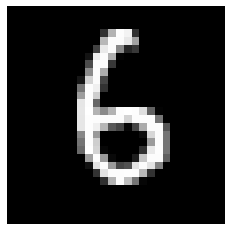

In [ ]:
plt.axis('off')
plt.imshow(X_test[21],cmap='gray')
plt.show()

In [ ]:
X_train=X_train/255
X_test=X_test/255

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [ ]:
history=model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs=5,batch_size=10)

2022-01-07 05:03:23.055658: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5


2022-01-07 05:03:26.424461: I tensorflow/stream_executor/cuda/cuda_dnn.cc:381] Loaded cuDNN version 8204


   1/6000 [..............................] - ETA: 18:35:19 - loss: 2.2507 - acc: 0.3000

   8/6000 [..............................] - ETA: 43s - loss: 2.1178 - acc: 0.3000     

  30/6000 [..............................] - ETA: 20s - loss: 1.5112 - acc: 0.5900

  46/6000 [..............................] - ETA: 20s - loss: 1.2747 - acc: 0.6500

  68/6000 [..............................] - ETA: 18s - loss: 1.0830 - acc: 0.7044

  90/6000 [..............................] - ETA: 17s - loss: 0.9657 - acc: 0.7300

 109/6000 [..............................] - ETA: 16s - loss: 0.8905 - acc: 0.7468

 127/6000 [..............................] - ETA: 16s - loss: 0.8282 - acc: 0.7654

 149/6000 [..............................] - ETA: 16s - loss: 0.7747 - acc: 0.7805

 169/6000 [..............................] - ETA: 16s - loss: 0.7394 - acc: 0.7876

 192/6000 [..............................] - ETA: 15s - loss: 0.6958 - acc: 0.7990

 212/6000 [>.............................] - ETA: 15s - loss: 0.6626 - acc: 0.8085

 234/6000 [>.............................] - ETA: 15s - loss: 0.6228 - acc: 0.8175

 256/6000 [>.............................] - ETA: 15s - loss: 0.6016 - acc: 0.8203

 278/6000 [>.............................] - ETA: 14s - loss: 0.5753 - acc: 0.8281

 300/6000 [>.............................] - ETA: 14s - loss: 0.5537 - acc: 0.8350

 321/6000 [>.............................] - ETA: 14s - loss: 0.5360 - acc: 0.8402

 342/6000 [>.............................] - ETA: 14s - loss: 0.5203 - acc: 0.8450

 365/6000 [>.............................] - ETA: 14s - loss: 0.5061 - acc: 0.8488

 387/6000 [>.............................] - ETA: 14s - loss: 0.4857 - acc: 0.8550

 408/6000 [=>............................] - ETA: 14s - loss: 0.4793 - acc: 0.8574

 429/6000 [=>............................] - ETA: 14s - loss: 0.4669 - acc: 0.8606

 451/6000 [=>............................] - ETA: 13s - loss: 0.4571 - acc: 0.8639

 471/6000 [=>............................] - ETA: 13s - loss: 0.4471 - acc: 0.8675

 492/6000 [=>............................] - ETA: 13s - loss: 0.4400 - acc: 0.8701

 513/6000 [=>............................] - ETA: 13s - loss: 0.4330 - acc: 0.8721

 534/6000 [=>............................] - ETA: 13s - loss: 0.4197 - acc: 0.8764

 556/6000 [=>............................] - ETA: 13s - loss: 0.4108 - acc: 0.8788

 572/6000 [=>............................] - ETA: 13s - loss: 0.4061 - acc: 0.8802

 593/6000 [=>............................] - ETA: 13s - loss: 0.3983 - acc: 0.8825

 615/6000 [==>...........................] - ETA: 13s - loss: 0.3900 - acc: 0.8847

 637/6000 [==>...........................] - ETA: 13s - loss: 0.3815 - acc: 0.8874

 659/6000 [==>...........................] - ETA: 13s - loss: 0.3764 - acc: 0.8891

 678/6000 [==>...........................] - ETA: 13s - loss: 0.3705 - acc: 0.8907

 699/6000 [==>...........................] - ETA: 13s - loss: 0.3635 - acc: 0.8931

 720/6000 [==>...........................] - ETA: 13s - loss: 0.3589 - acc: 0.8946

 742/6000 [==>...........................] - ETA: 13s - loss: 0.3530 - acc: 0.8962

 764/6000 [==>...........................] - ETA: 12s - loss: 0.3473 - acc: 0.8982

 786/6000 [==>...........................] - ETA: 12s - loss: 0.3420 - acc: 0.8995

 807/6000 [===>..........................] - ETA: 12s - loss: 0.3388 - acc: 0.9002

 829/6000 [===>..........................] - ETA: 12s - loss: 0.3349 - acc: 0.9017

 850/6000 [===>..........................] - ETA: 12s - loss: 0.3320 - acc: 0.9020

 870/6000 [===>..........................] - ETA: 12s - loss: 0.3269 - acc: 0.9038

 891/6000 [===>..........................] - ETA: 12s - loss: 0.3238 - acc: 0.9046

 912/6000 [===>..........................] - ETA: 12s - loss: 0.3198 - acc: 0.9059

 933/6000 [===>..........................] - ETA: 12s - loss: 0.3159 - acc: 0.9073

 954/6000 [===>..........................] - ETA: 12s - loss: 0.3136 - acc: 0.9077

 974/6000 [===>..........................] - ETA: 12s - loss: 0.3099 - acc: 0.9086

 995/6000 [===>..........................] - ETA: 12s - loss: 0.3073 - acc: 0.9097

1017/6000 [====>.........................] - ETA: 12s - loss: 0.3028 - acc: 0.9110

1040/6000 [====>.........................] - ETA: 12s - loss: 0.2989 - acc: 0.9120

1061/6000 [====>.........................] - ETA: 12s - loss: 0.2959 - acc: 0.9127

1082/6000 [====>.........................] - ETA: 12s - loss: 0.2937 - acc: 0.9132

1105/6000 [====>.........................] - ETA: 11s - loss: 0.2913 - acc: 0.9135

1124/6000 [====>.........................] - ETA: 11s - loss: 0.2891 - acc: 0.9141

1146/6000 [====>.........................] - ETA: 11s - loss: 0.2847 - acc: 0.9155

1168/6000 [====>.........................] - ETA: 11s - loss: 0.2828 - acc: 0.9161

1191/6000 [====>.........................] - ETA: 11s - loss: 0.2801 - acc: 0.9168

1214/6000 [=====>........................] - ETA: 11s - loss: 0.2761 - acc: 0.9180

1235/6000 [=====>........................] - ETA: 11s - loss: 0.2742 - acc: 0.9184

1257/6000 [=====>........................] - ETA: 11s - loss: 0.2713 - acc: 0.9192

1280/6000 [=====>........................] - ETA: 11s - loss: 0.2683 - acc: 0.9199

1302/6000 [=====>........................] - ETA: 11s - loss: 0.2663 - acc: 0.9206

1325/6000 [=====>........................] - ETA: 11s - loss: 0.2640 - acc: 0.9211

1347/6000 [=====>........................] - ETA: 11s - loss: 0.2616 - acc: 0.9218

1369/6000 [=====>........................] - ETA: 11s - loss: 0.2589 - acc: 0.9224

1391/6000 [=====>........................] - ETA: 11s - loss: 0.2564 - acc: 0.9232

1410/6000 [======>.......................] - ETA: 11s - loss: 0.2539 - acc: 0.9240

1431/6000 [======>.......................] - ETA: 11s - loss: 0.2523 - acc: 0.9245

1454/6000 [======>.......................] - ETA: 11s - loss: 0.2508 - acc: 0.9251

1476/6000 [======>.......................] - ETA: 10s - loss: 0.2489 - acc: 0.9257

1498/6000 [======>.......................] - ETA: 10s - loss: 0.2464 - acc: 0.9266

1520/6000 [======>.......................] - ETA: 10s - loss: 0.2454 - acc: 0.9268

1543/6000 [======>.......................] - ETA: 10s - loss: 0.2433 - acc: 0.9274

1566/6000 [======>.......................] - ETA: 10s - loss: 0.2410 - acc: 0.9280

1588/6000 [======>.......................] - ETA: 10s - loss: 0.2389 - acc: 0.9287

1609/6000 [=======>......................] - ETA: 10s - loss: 0.2373 - acc: 0.9291

1630/6000 [=======>......................] - ETA: 10s - loss: 0.2357 - acc: 0.9295

1653/6000 [=======>......................] - ETA: 10s - loss: 0.2336 - acc: 0.9302

1675/6000 [=======>......................] - ETA: 10s - loss: 0.2325 - acc: 0.9305

1696/6000 [=======>......................] - ETA: 10s - loss: 0.2308 - acc: 0.9310

1717/6000 [=======>......................] - ETA: 10s - loss: 0.2297 - acc: 0.9312

1739/6000 [=======>......................] - ETA: 10s - loss: 0.2289 - acc: 0.9314

1761/6000 [=======>......................] - ETA: 10s - loss: 0.2271 - acc: 0.9317

1783/6000 [=======>......................] - ETA: 10s - loss: 0.2251 - acc: 0.9322

1804/6000 [========>.....................] - ETA: 10s - loss: 0.2244 - acc: 0.9325

1825/6000 [========>.....................] - ETA: 10s - loss: 0.2230 - acc: 0.9329

1846/6000 [========>.....................] - ETA: 9s - loss: 0.2216 - acc: 0.9334 

1867/6000 [========>.....................] - ETA: 9s - loss: 0.2203 - acc: 0.9338

1889/6000 [========>.....................] - ETA: 9s - loss: 0.2201 - acc: 0.9337

1911/6000 [========>.....................] - ETA: 9s - loss: 0.2192 - acc: 0.9338

1932/6000 [========>.....................] - ETA: 9s - loss: 0.2184 - acc: 0.9339

1953/6000 [========>.....................] - ETA: 9s - loss: 0.2175 - acc: 0.9342

1976/6000 [========>.....................] - ETA: 9s - loss: 0.2165 - acc: 0.9346

1998/6000 [========>.....................] - ETA: 9s - loss: 0.2151 - acc: 0.9351

2021/6000 [=========>....................] - ETA: 9s - loss: 0.2132 - acc: 0.9356

2043/6000 [=========>....................] - ETA: 9s - loss: 0.2126 - acc: 0.9359

2066/6000 [=========>....................] - ETA: 9s - loss: 0.2117 - acc: 0.9363

2088/6000 [=========>....................] - ETA: 9s - loss: 0.2102 - acc: 0.9367

2109/6000 [=========>....................] - ETA: 9s - loss: 0.2095 - acc: 0.9368

2130/6000 [=========>....................] - ETA: 9s - loss: 0.2086 - acc: 0.9371

2153/6000 [=========>....................] - ETA: 9s - loss: 0.2081 - acc: 0.9373

2173/6000 [=========>....................] - ETA: 9s - loss: 0.2071 - acc: 0.9376

2196/6000 [=========>....................] - ETA: 9s - loss: 0.2063 - acc: 0.9378

2217/6000 [==========>...................] - ETA: 9s - loss: 0.2059 - acc: 0.9380

2239/6000 [==========>...................] - ETA: 9s - loss: 0.2052 - acc: 0.9382

2257/6000 [==========>...................] - ETA: 8s - loss: 0.2044 - acc: 0.9384

2278/6000 [==========>...................] - ETA: 8s - loss: 0.2036 - acc: 0.9386

2300/6000 [==========>...................] - ETA: 8s - loss: 0.2030 - acc: 0.9388

2322/6000 [==========>...................] - ETA: 8s - loss: 0.2021 - acc: 0.9391

2344/6000 [==========>...................] - ETA: 8s - loss: 0.2013 - acc: 0.9395

2366/6000 [==========>...................] - ETA: 8s - loss: 0.2001 - acc: 0.9399

2388/6000 [==========>...................] - ETA: 8s - loss: 0.1991 - acc: 0.9401

2409/6000 [===========>..................] - ETA: 8s - loss: 0.1978 - acc: 0.9405

2430/6000 [===========>..................] - ETA: 8s - loss: 0.1970 - acc: 0.9408

2451/6000 [===========>..................] - ETA: 8s - loss: 0.1965 - acc: 0.9409

2473/6000 [===========>..................] - ETA: 8s - loss: 0.1954 - acc: 0.9413

2494/6000 [===========>..................] - ETA: 8s - loss: 0.1948 - acc: 0.9415

2516/6000 [===========>..................] - ETA: 8s - loss: 0.1938 - acc: 0.9418

2537/6000 [===========>..................] - ETA: 8s - loss: 0.1928 - acc: 0.9421

2557/6000 [===========>..................] - ETA: 8s - loss: 0.1916 - acc: 0.9425

2579/6000 [===========>..................] - ETA: 8s - loss: 0.1909 - acc: 0.9427

2599/6000 [===========>..................] - ETA: 8s - loss: 0.1906 - acc: 0.9427

2622/6000 [============>.................] - ETA: 8s - loss: 0.1897 - acc: 0.9429

2643/6000 [============>.................] - ETA: 8s - loss: 0.1893 - acc: 0.9431

2665/6000 [============>.................] - ETA: 7s - loss: 0.1883 - acc: 0.9435

2688/6000 [============>.................] - ETA: 7s - loss: 0.1872 - acc: 0.9438

2707/6000 [============>.................] - ETA: 7s - loss: 0.1863 - acc: 0.9441

2726/6000 [============>.................] - ETA: 7s - loss: 0.1856 - acc: 0.9443

2749/6000 [============>.................] - ETA: 7s - loss: 0.1848 - acc: 0.9443

2770/6000 [============>.................] - ETA: 7s - loss: 0.1840 - acc: 0.9447

2792/6000 [============>.................] - ETA: 7s - loss: 0.1830 - acc: 0.9450

2814/6000 [=============>................] - ETA: 7s - loss: 0.1822 - acc: 0.9452

2835/6000 [=============>................] - ETA: 7s - loss: 0.1816 - acc: 0.9454

2857/6000 [=============>................] - ETA: 7s - loss: 0.1805 - acc: 0.9457

2879/6000 [=============>................] - ETA: 7s - loss: 0.1803 - acc: 0.9458

2900/6000 [=============>................] - ETA: 7s - loss: 0.1797 - acc: 0.9460

2919/6000 [=============>................] - ETA: 7s - loss: 0.1791 - acc: 0.9461

2937/6000 [=============>................] - ETA: 7s - loss: 0.1785 - acc: 0.9463

2958/6000 [=============>................] - ETA: 7s - loss: 0.1778 - acc: 0.9465

2980/6000 [=============>................] - ETA: 7s - loss: 0.1771 - acc: 0.9467

3001/6000 [==============>...............] - ETA: 7s - loss: 0.1760 - acc: 0.9470

3023/6000 [==============>...............] - ETA: 7s - loss: 0.1752 - acc: 0.9473

3044/6000 [==============>...............] - ETA: 7s - loss: 0.1744 - acc: 0.9475

3064/6000 [==============>...............] - ETA: 7s - loss: 0.1737 - acc: 0.9477

3083/6000 [==============>...............] - ETA: 7s - loss: 0.1732 - acc: 0.9479

3103/6000 [==============>...............] - ETA: 6s - loss: 0.1727 - acc: 0.9480

3125/6000 [==============>...............] - ETA: 6s - loss: 0.1720 - acc: 0.9482

3148/6000 [==============>...............] - ETA: 6s - loss: 0.1714 - acc: 0.9484

3170/6000 [==============>...............] - ETA: 6s - loss: 0.1710 - acc: 0.9485

3192/6000 [==============>...............] - ETA: 6s - loss: 0.1704 - acc: 0.9487

3214/6000 [===============>..............] - ETA: 6s - loss: 0.1695 - acc: 0.9489

3237/6000 [===============>..............] - ETA: 6s - loss: 0.1690 - acc: 0.9492

3260/6000 [===============>..............] - ETA: 6s - loss: 0.1683 - acc: 0.9494

3283/6000 [===============>..............] - ETA: 6s - loss: 0.1681 - acc: 0.9495

3307/6000 [===============>..............] - ETA: 6s - loss: 0.1676 - acc: 0.9497

3329/6000 [===============>..............] - ETA: 6s - loss: 0.1673 - acc: 0.9498

3351/6000 [===============>..............] - ETA: 6s - loss: 0.1671 - acc: 0.9499

3373/6000 [===============>..............] - ETA: 6s - loss: 0.1668 - acc: 0.9500

3396/6000 [===============>..............] - ETA: 6s - loss: 0.1663 - acc: 0.9501

3418/6000 [================>.............] - ETA: 6s - loss: 0.1658 - acc: 0.9502

3439/6000 [================>.............] - ETA: 6s - loss: 0.1652 - acc: 0.9505

3460/6000 [================>.............] - ETA: 6s - loss: 0.1644 - acc: 0.9507

3481/6000 [================>.............] - ETA: 6s - loss: 0.1640 - acc: 0.9508

3503/6000 [================>.............] - ETA: 5s - loss: 0.1634 - acc: 0.9510

3525/6000 [================>.............] - ETA: 5s - loss: 0.1629 - acc: 0.9511

3547/6000 [================>.............] - ETA: 5s - loss: 0.1625 - acc: 0.9513

3569/6000 [================>.............] - ETA: 5s - loss: 0.1620 - acc: 0.9515

3591/6000 [================>.............] - ETA: 5s - loss: 0.1614 - acc: 0.9516

3613/6000 [=================>............] - ETA: 5s - loss: 0.1608 - acc: 0.9518

3629/6000 [=================>............] - ETA: 5s - loss: 0.1605 - acc: 0.9519

3651/6000 [=================>............] - ETA: 5s - loss: 0.1599 - acc: 0.9521

3673/6000 [=================>............] - ETA: 5s - loss: 0.1594 - acc: 0.9522

3694/6000 [=================>............] - ETA: 5s - loss: 0.1589 - acc: 0.9524

3716/6000 [=================>............] - ETA: 5s - loss: 0.1585 - acc: 0.9525

3739/6000 [=================>............] - ETA: 5s - loss: 0.1579 - acc: 0.9527

3758/6000 [=================>............] - ETA: 5s - loss: 0.1575 - acc: 0.9528

3779/6000 [=================>............] - ETA: 5s - loss: 0.1570 - acc: 0.9529

3800/6000 [==================>...........] - ETA: 5s - loss: 0.1565 - acc: 0.9530

3819/6000 [==================>...........] - ETA: 5s - loss: 0.1563 - acc: 0.9530

3840/6000 [==================>...........] - ETA: 5s - loss: 0.1560 - acc: 0.9532

3861/6000 [==================>...........] - ETA: 5s - loss: 0.1558 - acc: 0.9533

3880/6000 [==================>...........] - ETA: 5s - loss: 0.1555 - acc: 0.9534

3901/6000 [==================>...........] - ETA: 5s - loss: 0.1549 - acc: 0.9536

3923/6000 [==================>...........] - ETA: 4s - loss: 0.1545 - acc: 0.9536

3943/6000 [==================>...........] - ETA: 4s - loss: 0.1540 - acc: 0.9538

3965/6000 [==================>...........] - ETA: 4s - loss: 0.1535 - acc: 0.9539

3986/6000 [==================>...........] - ETA: 4s - loss: 0.1529 - acc: 0.9541

4004/6000 [===================>..........] - ETA: 4s - loss: 0.1528 - acc: 0.9541

4025/6000 [===================>..........] - ETA: 4s - loss: 0.1522 - acc: 0.9543

4047/6000 [===================>..........] - ETA: 4s - loss: 0.1521 - acc: 0.9544

4069/6000 [===================>..........] - ETA: 4s - loss: 0.1517 - acc: 0.9545

4091/6000 [===================>..........] - ETA: 4s - loss: 0.1514 - acc: 0.9546

4113/6000 [===================>..........] - ETA: 4s - loss: 0.1509 - acc: 0.9547

4134/6000 [===================>..........] - ETA: 4s - loss: 0.1510 - acc: 0.9547

4156/6000 [===================>..........] - ETA: 4s - loss: 0.1506 - acc: 0.9548

4177/6000 [===================>..........] - ETA: 4s - loss: 0.1499 - acc: 0.9550

4199/6000 [===================>..........] - ETA: 4s - loss: 0.1495 - acc: 0.9552

4221/6000 [====================>.........] - ETA: 4s - loss: 0.1490 - acc: 0.9553

4243/6000 [====================>.........] - ETA: 4s - loss: 0.1486 - acc: 0.9554

4263/6000 [====================>.........] - ETA: 4s - loss: 0.1483 - acc: 0.9555

4283/6000 [====================>.........] - ETA: 4s - loss: 0.1482 - acc: 0.9555

4304/6000 [====================>.........] - ETA: 4s - loss: 0.1481 - acc: 0.9554

4326/6000 [====================>.........] - ETA: 4s - loss: 0.1477 - acc: 0.9556

4347/6000 [====================>.........] - ETA: 3s - loss: 0.1475 - acc: 0.9557

4369/6000 [====================>.........] - ETA: 3s - loss: 0.1470 - acc: 0.9559

4390/6000 [====================>.........] - ETA: 3s - loss: 0.1468 - acc: 0.9560

4412/6000 [=====================>........] - ETA: 3s - loss: 0.1467 - acc: 0.9561

4433/6000 [=====================>........] - ETA: 3s - loss: 0.1462 - acc: 0.9562

4453/6000 [=====================>........] - ETA: 3s - loss: 0.1457 - acc: 0.9563

4474/6000 [=====================>........] - ETA: 3s - loss: 0.1452 - acc: 0.9565

4496/6000 [=====================>........] - ETA: 3s - loss: 0.1448 - acc: 0.9567

4518/6000 [=====================>........] - ETA: 3s - loss: 0.1445 - acc: 0.9567

4540/6000 [=====================>........] - ETA: 3s - loss: 0.1439 - acc: 0.9569

4561/6000 [=====================>........] - ETA: 3s - loss: 0.1436 - acc: 0.9570

4582/6000 [=====================>........] - ETA: 3s - loss: 0.1435 - acc: 0.9570

4603/6000 [======================>.......] - ETA: 3s - loss: 0.1432 - acc: 0.9571

4625/6000 [======================>.......] - ETA: 3s - loss: 0.1426 - acc: 0.9572

4647/6000 [======================>.......] - ETA: 3s - loss: 0.1423 - acc: 0.9573

4665/6000 [======================>.......] - ETA: 3s - loss: 0.1420 - acc: 0.9573

4686/6000 [======================>.......] - ETA: 3s - loss: 0.1417 - acc: 0.9575

4706/6000 [======================>.......] - ETA: 3s - loss: 0.1416 - acc: 0.9575

4726/6000 [======================>.......] - ETA: 3s - loss: 0.1411 - acc: 0.9576

4748/6000 [======================>.......] - ETA: 3s - loss: 0.1410 - acc: 0.9576

4764/6000 [======================>.......] - ETA: 2s - loss: 0.1407 - acc: 0.9577

4781/6000 [======================>.......] - ETA: 2s - loss: 0.1406 - acc: 0.9577

4804/6000 [=======================>......] - ETA: 2s - loss: 0.1402 - acc: 0.9578

4826/6000 [=======================>......] - ETA: 2s - loss: 0.1398 - acc: 0.9580

4846/6000 [=======================>......] - ETA: 2s - loss: 0.1395 - acc: 0.9580

4867/6000 [=======================>......] - ETA: 2s - loss: 0.1391 - acc: 0.9582

4889/6000 [=======================>......] - ETA: 2s - loss: 0.1387 - acc: 0.9583

4911/6000 [=======================>......] - ETA: 2s - loss: 0.1385 - acc: 0.9584

4933/6000 [=======================>......] - ETA: 2s - loss: 0.1383 - acc: 0.9584

4956/6000 [=======================>......] - ETA: 2s - loss: 0.1379 - acc: 0.9585

4977/6000 [=======================>......] - ETA: 2s - loss: 0.1376 - acc: 0.9586

4999/6000 [=======================>......] - ETA: 2s - loss: 0.1373 - acc: 0.9587

5020/6000 [========================>.....] - ETA: 2s - loss: 0.1369 - acc: 0.9588

5039/6000 [========================>.....] - ETA: 2s - loss: 0.1366 - acc: 0.9589

5062/6000 [========================>.....] - ETA: 2s - loss: 0.1365 - acc: 0.9589

5084/6000 [========================>.....] - ETA: 2s - loss: 0.1362 - acc: 0.9590

5105/6000 [========================>.....] - ETA: 2s - loss: 0.1357 - acc: 0.9591

5125/6000 [========================>.....] - ETA: 2s - loss: 0.1354 - acc: 0.9592

5146/6000 [========================>.....] - ETA: 2s - loss: 0.1353 - acc: 0.9593

5168/6000 [========================>.....] - ETA: 2s - loss: 0.1351 - acc: 0.9594

5190/6000 [========================>.....] - ETA: 1s - loss: 0.1348 - acc: 0.9595

5212/6000 [=========================>....] - ETA: 1s - loss: 0.1343 - acc: 0.9596

5233/6000 [=========================>....] - ETA: 1s - loss: 0.1343 - acc: 0.9595

5255/6000 [=========================>....] - ETA: 1s - loss: 0.1339 - acc: 0.9597

5277/6000 [=========================>....] - ETA: 1s - loss: 0.1334 - acc: 0.9598

5299/6000 [=========================>....] - ETA: 1s - loss: 0.1331 - acc: 0.9599

5321/6000 [=========================>....] - ETA: 1s - loss: 0.1329 - acc: 0.9600

5343/6000 [=========================>....] - ETA: 1s - loss: 0.1328 - acc: 0.9601

5365/6000 [=========================>....] - ETA: 1s - loss: 0.1324 - acc: 0.9602

5386/6000 [=========================>....] - ETA: 1s - loss: 0.1321 - acc: 0.9603

5407/6000 [==========================>...] - ETA: 1s - loss: 0.1318 - acc: 0.9603

5429/6000 [==========================>...] - ETA: 1s - loss: 0.1313 - acc: 0.9605

5451/6000 [==========================>...] - ETA: 1s - loss: 0.1310 - acc: 0.9606

5473/6000 [==========================>...] - ETA: 1s - loss: 0.1309 - acc: 0.9607

5493/6000 [==========================>...] - ETA: 1s - loss: 0.1307 - acc: 0.9608

5515/6000 [==========================>...] - ETA: 1s - loss: 0.1305 - acc: 0.9608

5536/6000 [==========================>...] - ETA: 1s - loss: 0.1302 - acc: 0.9609

5558/6000 [==========================>...] - ETA: 1s - loss: 0.1299 - acc: 0.9610

5579/6000 [==========================>...] - ETA: 1s - loss: 0.1295 - acc: 0.9611

5599/6000 [==========================>...] - ETA: 0s - loss: 0.1294 - acc: 0.9611

5618/6000 [===========================>..] - ETA: 0s - loss: 0.1292 - acc: 0.9612

5640/6000 [===========================>..] - ETA: 0s - loss: 0.1292 - acc: 0.9612

5662/6000 [===========================>..] - ETA: 0s - loss: 0.1289 - acc: 0.9613

5685/6000 [===========================>..] - ETA: 0s - loss: 0.1286 - acc: 0.9614

5706/6000 [===========================>..] - ETA: 0s - loss: 0.1284 - acc: 0.9614

5727/6000 [===========================>..] - ETA: 0s - loss: 0.1283 - acc: 0.9614

5750/6000 [===========================>..] - ETA: 0s - loss: 0.1280 - acc: 0.9615

5771/6000 [===========================>..] - ETA: 0s - loss: 0.1280 - acc: 0.9615

5793/6000 [===========================>..] - ETA: 0s - loss: 0.1277 - acc: 0.9616

5814/6000 [============================>.] - ETA: 0s - loss: 0.1276 - acc: 0.9616

5835/6000 [============================>.] - ETA: 0s - loss: 0.1273 - acc: 0.9617

5856/6000 [============================>.] - ETA: 0s - loss: 0.1272 - acc: 0.9617

5876/6000 [============================>.] - ETA: 0s - loss: 0.1270 - acc: 0.9618

5897/6000 [============================>.] - ETA: 0s - loss: 0.1268 - acc: 0.9619

5918/6000 [============================>.] - ETA: 0s - loss: 0.1266 - acc: 0.9619

5938/6000 [============================>.] - ETA: 0s - loss: 0.1263 - acc: 0.9621

5959/6000 [============================>.] - ETA: 0s - loss: 0.1260 - acc: 0.9621

5981/6000 [============================>.] - ETA: 0s - loss: 0.1258 - acc: 0.9622

6000/6000 [==============================] - 27s 3ms/step - loss: 0.1259 - acc: 0.9622 - val_loss: 0.0647 - val_acc: 0.9793


Epoch 2/5
   1/6000 [..............................] - ETA: 18s - loss: 0.0127 - acc: 1.0000

  22/6000 [..............................] - ETA: 14s - loss: 0.0815 - acc: 0.9727

  43/6000 [..............................] - ETA: 14s - loss: 0.0613 - acc: 0.9837

  65/6000 [..............................] - ETA: 14s - loss: 0.0665 - acc: 0.9785

  86/6000 [..............................] - ETA: 14s - loss: 0.0573 - acc: 0.9826

 107/6000 [..............................] - ETA: 14s - loss: 0.0535 - acc: 0.9832

 129/6000 [..............................] - ETA: 14s - loss: 0.0502 - acc: 0.9853

 149/6000 [..............................] - ETA: 14s - loss: 0.0507 - acc: 0.9852

 170/6000 [..............................] - ETA: 14s - loss: 0.0531 - acc: 0.9841

 192/6000 [..............................] - ETA: 13s - loss: 0.0527 - acc: 0.9828

 214/6000 [>.............................] - ETA: 13s - loss: 0.0496 - acc: 0.9841

 233/6000 [>.............................] - ETA: 14s - loss: 0.0482 - acc: 0.9837

 255/6000 [>.............................] - ETA: 13s - loss: 0.0510 - acc: 0.9827

 274/6000 [>.............................] - ETA: 13s - loss: 0.0525 - acc: 0.9825

 294/6000 [>.............................] - ETA: 13s - loss: 0.0539 - acc: 0.9816

 313/6000 [>.............................] - ETA: 13s - loss: 0.0522 - acc: 0.9824

 336/6000 [>.............................] - ETA: 13s - loss: 0.0499 - acc: 0.9833

 358/6000 [>.............................] - ETA: 13s - loss: 0.0508 - acc: 0.9838

 376/6000 [>.............................] - ETA: 13s - loss: 0.0496 - acc: 0.9840

 397/6000 [>.............................] - ETA: 13s - loss: 0.0515 - acc: 0.9839

 418/6000 [=>............................] - ETA: 13s - loss: 0.0520 - acc: 0.9835

 440/6000 [=>............................] - ETA: 13s - loss: 0.0526 - acc: 0.9834

 462/6000 [=>............................] - ETA: 13s - loss: 0.0523 - acc: 0.9835

 483/6000 [=>............................] - ETA: 13s - loss: 0.0517 - acc: 0.9841

 503/6000 [=>............................] - ETA: 13s - loss: 0.0503 - acc: 0.9845

 525/6000 [=>............................] - ETA: 13s - loss: 0.0492 - acc: 0.9850

 546/6000 [=>............................] - ETA: 13s - loss: 0.0478 - acc: 0.9855

 566/6000 [=>............................] - ETA: 13s - loss: 0.0469 - acc: 0.9859

 588/6000 [=>............................] - ETA: 13s - loss: 0.0455 - acc: 0.9864

 610/6000 [==>...........................] - ETA: 13s - loss: 0.0445 - acc: 0.9867

 631/6000 [==>...........................] - ETA: 13s - loss: 0.0437 - acc: 0.9868

 652/6000 [==>...........................] - ETA: 13s - loss: 0.0427 - acc: 0.9873

 673/6000 [==>...........................] - ETA: 12s - loss: 0.0433 - acc: 0.9871

 695/6000 [==>...........................] - ETA: 12s - loss: 0.0443 - acc: 0.9865

 717/6000 [==>...........................] - ETA: 12s - loss: 0.0442 - acc: 0.9863

 739/6000 [==>...........................] - ETA: 12s - loss: 0.0441 - acc: 0.9863

 760/6000 [==>...........................] - ETA: 12s - loss: 0.0432 - acc: 0.9867

 781/6000 [==>...........................] - ETA: 12s - loss: 0.0429 - acc: 0.9868

 803/6000 [===>..........................] - ETA: 12s - loss: 0.0426 - acc: 0.9869

 825/6000 [===>..........................] - ETA: 12s - loss: 0.0447 - acc: 0.9864

 847/6000 [===>..........................] - ETA: 12s - loss: 0.0446 - acc: 0.9862

 869/6000 [===>..........................] - ETA: 12s - loss: 0.0445 - acc: 0.9862

 891/6000 [===>..........................] - ETA: 12s - loss: 0.0452 - acc: 0.9859

 913/6000 [===>..........................] - ETA: 12s - loss: 0.0453 - acc: 0.9858

 935/6000 [===>..........................] - ETA: 12s - loss: 0.0466 - acc: 0.9852

 957/6000 [===>..........................] - ETA: 12s - loss: 0.0472 - acc: 0.9848

 979/6000 [===>..........................] - ETA: 12s - loss: 0.0467 - acc: 0.9851

1002/6000 [====>.........................] - ETA: 12s - loss: 0.0473 - acc: 0.9849

1024/6000 [====>.........................] - ETA: 11s - loss: 0.0482 - acc: 0.9850

1046/6000 [====>.........................] - ETA: 11s - loss: 0.0481 - acc: 0.9849

1065/6000 [====>.........................] - ETA: 11s - loss: 0.0483 - acc: 0.9849

1087/6000 [====>.........................] - ETA: 11s - loss: 0.0487 - acc: 0.9846

1107/6000 [====>.........................] - ETA: 11s - loss: 0.0489 - acc: 0.9846

1128/6000 [====>.........................] - ETA: 11s - loss: 0.0485 - acc: 0.9847

1149/6000 [====>.........................] - ETA: 11s - loss: 0.0503 - acc: 0.9842

1171/6000 [====>.........................] - ETA: 11s - loss: 0.0498 - acc: 0.9845

1193/6000 [====>.........................] - ETA: 11s - loss: 0.0492 - acc: 0.9847

1215/6000 [=====>........................] - ETA: 11s - loss: 0.0485 - acc: 0.9850

1237/6000 [=====>........................] - ETA: 11s - loss: 0.0479 - acc: 0.9852

1259/6000 [=====>........................] - ETA: 11s - loss: 0.0485 - acc: 0.9852

1280/6000 [=====>........................] - ETA: 11s - loss: 0.0483 - acc: 0.9854

1300/6000 [=====>........................] - ETA: 11s - loss: 0.0482 - acc: 0.9855

1321/6000 [=====>........................] - ETA: 11s - loss: 0.0481 - acc: 0.9855

1343/6000 [=====>........................] - ETA: 11s - loss: 0.0484 - acc: 0.9854

1364/6000 [=====>........................] - ETA: 11s - loss: 0.0482 - acc: 0.9854

1386/6000 [=====>........................] - ETA: 11s - loss: 0.0482 - acc: 0.9854

1404/6000 [======>.......................] - ETA: 11s - loss: 0.0483 - acc: 0.9853

1422/6000 [======>.......................] - ETA: 11s - loss: 0.0486 - acc: 0.9852

1441/6000 [======>.......................] - ETA: 11s - loss: 0.0488 - acc: 0.9851

1462/6000 [======>.......................] - ETA: 10s - loss: 0.0491 - acc: 0.9851

1481/6000 [======>.......................] - ETA: 10s - loss: 0.0492 - acc: 0.9851

1503/6000 [======>.......................] - ETA: 10s - loss: 0.0492 - acc: 0.9851

1524/6000 [======>.......................] - ETA: 10s - loss: 0.0498 - acc: 0.9849

1547/6000 [======>.......................] - ETA: 10s - loss: 0.0499 - acc: 0.9847

1569/6000 [======>.......................] - ETA: 10s - loss: 0.0497 - acc: 0.9849

1592/6000 [======>.......................] - ETA: 10s - loss: 0.0496 - acc: 0.9849

1615/6000 [=======>......................] - ETA: 10s - loss: 0.0494 - acc: 0.9850

1638/6000 [=======>......................] - ETA: 10s - loss: 0.0490 - acc: 0.9851

1661/6000 [=======>......................] - ETA: 10s - loss: 0.0487 - acc: 0.9852

1683/6000 [=======>......................] - ETA: 10s - loss: 0.0485 - acc: 0.9853

1703/6000 [=======>......................] - ETA: 10s - loss: 0.0486 - acc: 0.9853

1724/6000 [=======>......................] - ETA: 10s - loss: 0.0485 - acc: 0.9853

1746/6000 [=======>......................] - ETA: 10s - loss: 0.0488 - acc: 0.9851

1768/6000 [=======>......................] - ETA: 10s - loss: 0.0493 - acc: 0.9849

1789/6000 [=======>......................] - ETA: 10s - loss: 0.0494 - acc: 0.9849

1811/6000 [========>.....................] - ETA: 10s - loss: 0.0493 - acc: 0.9849

1833/6000 [========>.....................] - ETA: 10s - loss: 0.0493 - acc: 0.9849

1855/6000 [========>.....................] - ETA: 9s - loss: 0.0498 - acc: 0.9848 

1876/6000 [========>.....................] - ETA: 9s - loss: 0.0500 - acc: 0.9848

1898/6000 [========>.....................] - ETA: 9s - loss: 0.0499 - acc: 0.9847

1919/6000 [========>.....................] - ETA: 9s - loss: 0.0499 - acc: 0.9846

1935/6000 [========>.....................] - ETA: 9s - loss: 0.0497 - acc: 0.9847

1957/6000 [========>.....................] - ETA: 9s - loss: 0.0499 - acc: 0.9846

1979/6000 [========>.....................] - ETA: 9s - loss: 0.0495 - acc: 0.9847

2001/6000 [=========>....................] - ETA: 9s - loss: 0.0495 - acc: 0.9847

2023/6000 [=========>....................] - ETA: 9s - loss: 0.0492 - acc: 0.9848

2045/6000 [=========>....................] - ETA: 9s - loss: 0.0491 - acc: 0.9848

2067/6000 [=========>....................] - ETA: 9s - loss: 0.0487 - acc: 0.9850

2090/6000 [=========>....................] - ETA: 9s - loss: 0.0493 - acc: 0.9849

2112/6000 [=========>....................] - ETA: 9s - loss: 0.0491 - acc: 0.9849

2134/6000 [=========>....................] - ETA: 9s - loss: 0.0494 - acc: 0.9849

2155/6000 [=========>....................] - ETA: 9s - loss: 0.0494 - acc: 0.9849

2176/6000 [=========>....................] - ETA: 9s - loss: 0.0493 - acc: 0.9849

2196/6000 [=========>....................] - ETA: 9s - loss: 0.0490 - acc: 0.9850

2218/6000 [==========>...................] - ETA: 9s - loss: 0.0488 - acc: 0.9850

2241/6000 [==========>...................] - ETA: 9s - loss: 0.0487 - acc: 0.9851

2263/6000 [==========>...................] - ETA: 8s - loss: 0.0488 - acc: 0.9850

2285/6000 [==========>...................] - ETA: 8s - loss: 0.0486 - acc: 0.9851

2307/6000 [==========>...................] - ETA: 8s - loss: 0.0484 - acc: 0.9851

2327/6000 [==========>...................] - ETA: 8s - loss: 0.0482 - acc: 0.9852

2347/6000 [==========>...................] - ETA: 8s - loss: 0.0483 - acc: 0.9851

2365/6000 [==========>...................] - ETA: 8s - loss: 0.0480 - acc: 0.9852

2379/6000 [==========>...................] - ETA: 8s - loss: 0.0478 - acc: 0.9853

2401/6000 [===========>..................] - ETA: 8s - loss: 0.0478 - acc: 0.9853

2423/6000 [===========>..................] - ETA: 8s - loss: 0.0480 - acc: 0.9852

2444/6000 [===========>..................] - ETA: 8s - loss: 0.0484 - acc: 0.9852

2464/6000 [===========>..................] - ETA: 8s - loss: 0.0482 - acc: 0.9853

2486/6000 [===========>..................] - ETA: 8s - loss: 0.0481 - acc: 0.9853

2508/6000 [===========>..................] - ETA: 8s - loss: 0.0482 - acc: 0.9853

2530/6000 [===========>..................] - ETA: 8s - loss: 0.0483 - acc: 0.9853

2552/6000 [===========>..................] - ETA: 8s - loss: 0.0480 - acc: 0.9855

2574/6000 [===========>..................] - ETA: 8s - loss: 0.0479 - acc: 0.9855

2596/6000 [===========>..................] - ETA: 8s - loss: 0.0478 - acc: 0.9855

2619/6000 [============>.................] - ETA: 8s - loss: 0.0477 - acc: 0.9855

2641/6000 [============>.................] - ETA: 8s - loss: 0.0477 - acc: 0.9855

2663/6000 [============>.................] - ETA: 8s - loss: 0.0480 - acc: 0.9854

2685/6000 [============>.................] - ETA: 7s - loss: 0.0482 - acc: 0.9853

2707/6000 [============>.................] - ETA: 7s - loss: 0.0481 - acc: 0.9853

2729/6000 [============>.................] - ETA: 7s - loss: 0.0480 - acc: 0.9853

2748/6000 [============>.................] - ETA: 7s - loss: 0.0478 - acc: 0.9854

2769/6000 [============>.................] - ETA: 7s - loss: 0.0477 - acc: 0.9854

2791/6000 [============>.................] - ETA: 7s - loss: 0.0476 - acc: 0.9854

2812/6000 [=============>................] - ETA: 7s - loss: 0.0475 - acc: 0.9854

2834/6000 [=============>................] - ETA: 7s - loss: 0.0473 - acc: 0.9855

2856/6000 [=============>................] - ETA: 7s - loss: 0.0475 - acc: 0.9854

2877/6000 [=============>................] - ETA: 7s - loss: 0.0476 - acc: 0.9853

2898/6000 [=============>................] - ETA: 7s - loss: 0.0475 - acc: 0.9853

2921/6000 [=============>................] - ETA: 7s - loss: 0.0477 - acc: 0.9852

2943/6000 [=============>................] - ETA: 7s - loss: 0.0477 - acc: 0.9853

2965/6000 [=============>................] - ETA: 7s - loss: 0.0478 - acc: 0.9852

2988/6000 [=============>................] - ETA: 7s - loss: 0.0480 - acc: 0.9851

3009/6000 [==============>...............] - ETA: 7s - loss: 0.0479 - acc: 0.9851

3032/6000 [==============>...............] - ETA: 7s - loss: 0.0478 - acc: 0.9852

3054/6000 [==============>...............] - ETA: 7s - loss: 0.0482 - acc: 0.9850

3076/6000 [==============>...............] - ETA: 7s - loss: 0.0480 - acc: 0.9851

3098/6000 [==============>...............] - ETA: 6s - loss: 0.0479 - acc: 0.9852

3120/6000 [==============>...............] - ETA: 6s - loss: 0.0477 - acc: 0.9853

3142/6000 [==============>...............] - ETA: 6s - loss: 0.0475 - acc: 0.9853

3163/6000 [==============>...............] - ETA: 6s - loss: 0.0473 - acc: 0.9854

3183/6000 [==============>...............] - ETA: 6s - loss: 0.0471 - acc: 0.9854

3201/6000 [===============>..............] - ETA: 6s - loss: 0.0470 - acc: 0.9854

3223/6000 [===============>..............] - ETA: 6s - loss: 0.0468 - acc: 0.9854

3245/6000 [===============>..............] - ETA: 6s - loss: 0.0466 - acc: 0.9855

3267/6000 [===============>..............] - ETA: 6s - loss: 0.0465 - acc: 0.9856

3290/6000 [===============>..............] - ETA: 6s - loss: 0.0465 - acc: 0.9855

3312/6000 [===============>..............] - ETA: 6s - loss: 0.0464 - acc: 0.9856

3334/6000 [===============>..............] - ETA: 6s - loss: 0.0463 - acc: 0.9856

3356/6000 [===============>..............] - ETA: 6s - loss: 0.0466 - acc: 0.9856

3378/6000 [===============>..............] - ETA: 6s - loss: 0.0467 - acc: 0.9856

3400/6000 [================>.............] - ETA: 6s - loss: 0.0467 - acc: 0.9856

3421/6000 [================>.............] - ETA: 6s - loss: 0.0465 - acc: 0.9856

3443/6000 [================>.............] - ETA: 6s - loss: 0.0464 - acc: 0.9857

3465/6000 [================>.............] - ETA: 6s - loss: 0.0463 - acc: 0.9857

3487/6000 [================>.............] - ETA: 6s - loss: 0.0464 - acc: 0.9856

3508/6000 [================>.............] - ETA: 5s - loss: 0.0465 - acc: 0.9856

3530/6000 [================>.............] - ETA: 5s - loss: 0.0465 - acc: 0.9856

3551/6000 [================>.............] - ETA: 5s - loss: 0.0466 - acc: 0.9856

3572/6000 [================>.............] - ETA: 5s - loss: 0.0466 - acc: 0.9856

3594/6000 [================>.............] - ETA: 5s - loss: 0.0466 - acc: 0.9856

3615/6000 [=================>............] - ETA: 5s - loss: 0.0466 - acc: 0.9856

3637/6000 [=================>............] - ETA: 5s - loss: 0.0466 - acc: 0.9856

3658/6000 [=================>............] - ETA: 5s - loss: 0.0469 - acc: 0.9856

3679/6000 [=================>............] - ETA: 5s - loss: 0.0468 - acc: 0.9856

3700/6000 [=================>............] - ETA: 5s - loss: 0.0467 - acc: 0.9856

3722/6000 [=================>............] - ETA: 5s - loss: 0.0466 - acc: 0.9857

3743/6000 [=================>............] - ETA: 5s - loss: 0.0466 - acc: 0.9857

3765/6000 [=================>............] - ETA: 5s - loss: 0.0468 - acc: 0.9856

3787/6000 [=================>............] - ETA: 5s - loss: 0.0469 - acc: 0.9856

3809/6000 [==================>...........] - ETA: 5s - loss: 0.0468 - acc: 0.9856

3831/6000 [==================>...........] - ETA: 5s - loss: 0.0469 - acc: 0.9856

3854/6000 [==================>...........] - ETA: 5s - loss: 0.0471 - acc: 0.9855

3877/6000 [==================>...........] - ETA: 5s - loss: 0.0471 - acc: 0.9855

3900/6000 [==================>...........] - ETA: 5s - loss: 0.0470 - acc: 0.9855

3923/6000 [==================>...........] - ETA: 4s - loss: 0.0469 - acc: 0.9855

3946/6000 [==================>...........] - ETA: 4s - loss: 0.0467 - acc: 0.9856

3969/6000 [==================>...........] - ETA: 4s - loss: 0.0465 - acc: 0.9857

3991/6000 [==================>...........] - ETA: 4s - loss: 0.0463 - acc: 0.9857

4013/6000 [===================>..........] - ETA: 4s - loss: 0.0462 - acc: 0.9857

4034/6000 [===================>..........] - ETA: 4s - loss: 0.0462 - acc: 0.9857

4055/6000 [===================>..........] - ETA: 4s - loss: 0.0463 - acc: 0.9857

4076/6000 [===================>..........] - ETA: 4s - loss: 0.0462 - acc: 0.9857

4097/6000 [===================>..........] - ETA: 4s - loss: 0.0462 - acc: 0.9857

4119/6000 [===================>..........] - ETA: 4s - loss: 0.0463 - acc: 0.9857

4141/6000 [===================>..........] - ETA: 4s - loss: 0.0463 - acc: 0.9857

4161/6000 [===================>..........] - ETA: 4s - loss: 0.0463 - acc: 0.9857

4183/6000 [===================>..........] - ETA: 4s - loss: 0.0464 - acc: 0.9856

4205/6000 [====================>.........] - ETA: 4s - loss: 0.0465 - acc: 0.9856

4227/6000 [====================>.........] - ETA: 4s - loss: 0.0463 - acc: 0.9857

4249/6000 [====================>.........] - ETA: 4s - loss: 0.0465 - acc: 0.9857

4270/6000 [====================>.........] - ETA: 4s - loss: 0.0466 - acc: 0.9857

4292/6000 [====================>.........] - ETA: 4s - loss: 0.0464 - acc: 0.9857

4313/6000 [====================>.........] - ETA: 4s - loss: 0.0466 - acc: 0.9857

4334/6000 [====================>.........] - ETA: 3s - loss: 0.0465 - acc: 0.9858

4356/6000 [====================>.........] - ETA: 3s - loss: 0.0464 - acc: 0.9858

4377/6000 [====================>.........] - ETA: 3s - loss: 0.0466 - acc: 0.9858

4399/6000 [====================>.........] - ETA: 3s - loss: 0.0466 - acc: 0.9858

4421/6000 [=====================>........] - ETA: 3s - loss: 0.0467 - acc: 0.9858

4442/6000 [=====================>........] - ETA: 3s - loss: 0.0465 - acc: 0.9859

4461/6000 [=====================>........] - ETA: 3s - loss: 0.0465 - acc: 0.9859

4481/6000 [=====================>........] - ETA: 3s - loss: 0.0464 - acc: 0.9859

4501/6000 [=====================>........] - ETA: 3s - loss: 0.0463 - acc: 0.9859

4522/6000 [=====================>........] - ETA: 3s - loss: 0.0464 - acc: 0.9859

4545/6000 [=====================>........] - ETA: 3s - loss: 0.0463 - acc: 0.9860

4565/6000 [=====================>........] - ETA: 3s - loss: 0.0462 - acc: 0.9860

4586/6000 [=====================>........] - ETA: 3s - loss: 0.0460 - acc: 0.9860

4608/6000 [======================>.......] - ETA: 3s - loss: 0.0462 - acc: 0.9860

4630/6000 [======================>.......] - ETA: 3s - loss: 0.0460 - acc: 0.9860

4652/6000 [======================>.......] - ETA: 3s - loss: 0.0461 - acc: 0.9860

4674/6000 [======================>.......] - ETA: 3s - loss: 0.0461 - acc: 0.9860

4696/6000 [======================>.......] - ETA: 3s - loss: 0.0461 - acc: 0.9859

4716/6000 [======================>.......] - ETA: 3s - loss: 0.0461 - acc: 0.9859

4737/6000 [======================>.......] - ETA: 3s - loss: 0.0460 - acc: 0.9860

4758/6000 [======================>.......] - ETA: 2s - loss: 0.0459 - acc: 0.9860

4779/6000 [======================>.......] - ETA: 2s - loss: 0.0460 - acc: 0.9860

4802/6000 [=======================>......] - ETA: 2s - loss: 0.0459 - acc: 0.9860

4824/6000 [=======================>......] - ETA: 2s - loss: 0.0458 - acc: 0.9861

4845/6000 [=======================>......] - ETA: 2s - loss: 0.0457 - acc: 0.9861

4864/6000 [=======================>......] - ETA: 2s - loss: 0.0457 - acc: 0.9861

4879/6000 [=======================>......] - ETA: 2s - loss: 0.0456 - acc: 0.9861

4900/6000 [=======================>......] - ETA: 2s - loss: 0.0456 - acc: 0.9861

4922/6000 [=======================>......] - ETA: 2s - loss: 0.0458 - acc: 0.9860

4943/6000 [=======================>......] - ETA: 2s - loss: 0.0457 - acc: 0.9860

4964/6000 [=======================>......] - ETA: 2s - loss: 0.0457 - acc: 0.9861

4986/6000 [=======================>......] - ETA: 2s - loss: 0.0457 - acc: 0.9860

5008/6000 [========================>.....] - ETA: 2s - loss: 0.0458 - acc: 0.9860

5030/6000 [========================>.....] - ETA: 2s - loss: 0.0459 - acc: 0.9860

5052/6000 [========================>.....] - ETA: 2s - loss: 0.0460 - acc: 0.9860

5074/6000 [========================>.....] - ETA: 2s - loss: 0.0461 - acc: 0.9860

5096/6000 [========================>.....] - ETA: 2s - loss: 0.0461 - acc: 0.9860

5118/6000 [========================>.....] - ETA: 2s - loss: 0.0461 - acc: 0.9860

5141/6000 [========================>.....] - ETA: 2s - loss: 0.0462 - acc: 0.9860

5163/6000 [========================>.....] - ETA: 2s - loss: 0.0462 - acc: 0.9859

5185/6000 [========================>.....] - ETA: 1s - loss: 0.0463 - acc: 0.9859

5207/6000 [=========================>....] - ETA: 1s - loss: 0.0462 - acc: 0.9859

5229/6000 [=========================>....] - ETA: 1s - loss: 0.0461 - acc: 0.9860

5251/6000 [=========================>....] - ETA: 1s - loss: 0.0464 - acc: 0.9859

5273/6000 [=========================>....] - ETA: 1s - loss: 0.0465 - acc: 0.9859

5295/6000 [=========================>....] - ETA: 1s - loss: 0.0466 - acc: 0.9858

5316/6000 [=========================>....] - ETA: 1s - loss: 0.0467 - acc: 0.9858

5337/6000 [=========================>....] - ETA: 1s - loss: 0.0467 - acc: 0.9858

5359/6000 [=========================>....] - ETA: 1s - loss: 0.0466 - acc: 0.9858

5379/6000 [=========================>....] - ETA: 1s - loss: 0.0466 - acc: 0.9858

5401/6000 [==========================>...] - ETA: 1s - loss: 0.0468 - acc: 0.9857

5423/6000 [==========================>...] - ETA: 1s - loss: 0.0469 - acc: 0.9857

5445/6000 [==========================>...] - ETA: 1s - loss: 0.0468 - acc: 0.9858

5467/6000 [==========================>...] - ETA: 1s - loss: 0.0469 - acc: 0.9858

5490/6000 [==========================>...] - ETA: 1s - loss: 0.0469 - acc: 0.9858

5512/6000 [==========================>...] - ETA: 1s - loss: 0.0467 - acc: 0.9858

5533/6000 [==========================>...] - ETA: 1s - loss: 0.0466 - acc: 0.9858

5554/6000 [==========================>...] - ETA: 1s - loss: 0.0466 - acc: 0.9859

5573/6000 [==========================>...] - ETA: 1s - loss: 0.0467 - acc: 0.9858

5590/6000 [==========================>...] - ETA: 0s - loss: 0.0467 - acc: 0.9858

5609/6000 [===========================>..] - ETA: 0s - loss: 0.0467 - acc: 0.9858

5628/6000 [===========================>..] - ETA: 0s - loss: 0.0466 - acc: 0.9859

5648/6000 [===========================>..] - ETA: 0s - loss: 0.0466 - acc: 0.9859

5671/6000 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9859

5694/6000 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9859

5715/6000 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9859

5737/6000 [===========================>..] - ETA: 0s - loss: 0.0466 - acc: 0.9858

5759/6000 [===========================>..] - ETA: 0s - loss: 0.0466 - acc: 0.9859

5781/6000 [===========================>..] - ETA: 0s - loss: 0.0465 - acc: 0.9859

5803/6000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9859

5824/6000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9859

5846/6000 [============================>.] - ETA: 0s - loss: 0.0467 - acc: 0.9859

5867/6000 [============================>.] - ETA: 0s - loss: 0.0467 - acc: 0.9858

5889/6000 [============================>.] - ETA: 0s - loss: 0.0467 - acc: 0.9858

5911/6000 [============================>.] - ETA: 0s - loss: 0.0469 - acc: 0.9858

5934/6000 [============================>.] - ETA: 0s - loss: 0.0468 - acc: 0.9858

5956/6000 [============================>.] - ETA: 0s - loss: 0.0467 - acc: 0.9858

5977/6000 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9858

5999/6000 [============================>.] - ETA: 0s - loss: 0.0466 - acc: 0.9858

6000/6000 [==============================] - 15s 3ms/step - loss: 0.0466 - acc: 0.9858 - val_loss: 0.0477 - val_acc: 0.9834


Epoch 3/5
   1/6000 [..............................] - ETA: 14s - loss: 0.0340 - acc: 1.0000

  23/6000 [..............................] - ETA: 14s - loss: 0.0220 - acc: 0.9913

  45/6000 [..............................] - ETA: 13s - loss: 0.0301 - acc: 0.9867

  66/6000 [..............................] - ETA: 14s - loss: 0.0237 - acc: 0.9909

  89/6000 [..............................] - ETA: 13s - loss: 0.0200 - acc: 0.9921

 106/6000 [..............................] - ETA: 14s - loss: 0.0225 - acc: 0.9925

 122/6000 [..............................] - ETA: 15s - loss: 0.0273 - acc: 0.9918

 141/6000 [..............................] - ETA: 15s - loss: 0.0306 - acc: 0.9922

 163/6000 [..............................] - ETA: 14s - loss: 0.0280 - acc: 0.9933

 183/6000 [..............................] - ETA: 14s - loss: 0.0253 - acc: 0.9940

 206/6000 [>.............................] - ETA: 14s - loss: 0.0235 - acc: 0.9947

 228/6000 [>.............................] - ETA: 14s - loss: 0.0225 - acc: 0.9952

 251/6000 [>.............................] - ETA: 14s - loss: 0.0225 - acc: 0.9952

 272/6000 [>.............................] - ETA: 14s - loss: 0.0227 - acc: 0.9949

 293/6000 [>.............................] - ETA: 14s - loss: 0.0221 - acc: 0.9949

 315/6000 [>.............................] - ETA: 13s - loss: 0.0229 - acc: 0.9943

 337/6000 [>.............................] - ETA: 13s - loss: 0.0222 - acc: 0.9947

 359/6000 [>.............................] - ETA: 13s - loss: 0.0221 - acc: 0.9944

 382/6000 [>.............................] - ETA: 13s - loss: 0.0226 - acc: 0.9942

 405/6000 [=>............................] - ETA: 13s - loss: 0.0240 - acc: 0.9938

 427/6000 [=>............................] - ETA: 13s - loss: 0.0239 - acc: 0.9937

 449/6000 [=>............................] - ETA: 13s - loss: 0.0230 - acc: 0.9940

 471/6000 [=>............................] - ETA: 13s - loss: 0.0223 - acc: 0.9943

 493/6000 [=>............................] - ETA: 13s - loss: 0.0224 - acc: 0.9941

 515/6000 [=>............................] - ETA: 13s - loss: 0.0218 - acc: 0.9944

 537/6000 [=>............................] - ETA: 13s - loss: 0.0223 - acc: 0.9939

 558/6000 [=>............................] - ETA: 13s - loss: 0.0221 - acc: 0.9939

 581/6000 [=>............................] - ETA: 12s - loss: 0.0215 - acc: 0.9941

 604/6000 [==>...........................] - ETA: 12s - loss: 0.0213 - acc: 0.9940

 627/6000 [==>...........................] - ETA: 12s - loss: 0.0209 - acc: 0.9943

 650/6000 [==>...........................] - ETA: 12s - loss: 0.0206 - acc: 0.9943

 673/6000 [==>...........................] - ETA: 12s - loss: 0.0201 - acc: 0.9944

 696/6000 [==>...........................] - ETA: 12s - loss: 0.0197 - acc: 0.9945

 718/6000 [==>...........................] - ETA: 12s - loss: 0.0194 - acc: 0.9947

 741/6000 [==>...........................] - ETA: 12s - loss: 0.0199 - acc: 0.9943

 763/6000 [==>...........................] - ETA: 12s - loss: 0.0198 - acc: 0.9944

 786/6000 [==>...........................] - ETA: 12s - loss: 0.0200 - acc: 0.9941

 808/6000 [===>..........................] - ETA: 12s - loss: 0.0204 - acc: 0.9941

 831/6000 [===>..........................] - ETA: 12s - loss: 0.0206 - acc: 0.9937

 854/6000 [===>..........................] - ETA: 12s - loss: 0.0209 - acc: 0.9937

 877/6000 [===>..........................] - ETA: 12s - loss: 0.0215 - acc: 0.9934

 900/6000 [===>..........................] - ETA: 11s - loss: 0.0223 - acc: 0.9931

 922/6000 [===>..........................] - ETA: 11s - loss: 0.0222 - acc: 0.9931

 944/6000 [===>..........................] - ETA: 11s - loss: 0.0222 - acc: 0.9931

 961/6000 [===>..........................] - ETA: 11s - loss: 0.0220 - acc: 0.9932

 980/6000 [===>..........................] - ETA: 11s - loss: 0.0217 - acc: 0.9933

1002/6000 [====>.........................] - ETA: 11s - loss: 0.0214 - acc: 0.9934

1024/6000 [====>.........................] - ETA: 11s - loss: 0.0220 - acc: 0.9934

1047/6000 [====>.........................] - ETA: 11s - loss: 0.0216 - acc: 0.9935

1069/6000 [====>.........................] - ETA: 11s - loss: 0.0225 - acc: 0.9933

1092/6000 [====>.........................] - ETA: 11s - loss: 0.0222 - acc: 0.9933

1113/6000 [====>.........................] - ETA: 11s - loss: 0.0219 - acc: 0.9934

1135/6000 [====>.........................] - ETA: 11s - loss: 0.0216 - acc: 0.9935

1158/6000 [====>.........................] - ETA: 11s - loss: 0.0213 - acc: 0.9936

1181/6000 [====>.........................] - ETA: 11s - loss: 0.0212 - acc: 0.9936

1203/6000 [=====>........................] - ETA: 11s - loss: 0.0211 - acc: 0.9935

1226/6000 [=====>........................] - ETA: 11s - loss: 0.0214 - acc: 0.9935

1247/6000 [=====>........................] - ETA: 11s - loss: 0.0215 - acc: 0.9934

1269/6000 [=====>........................] - ETA: 11s - loss: 0.0214 - acc: 0.9935

1291/6000 [=====>........................] - ETA: 11s - loss: 0.0213 - acc: 0.9936

1313/6000 [=====>........................] - ETA: 11s - loss: 0.0223 - acc: 0.9932

1333/6000 [=====>........................] - ETA: 10s - loss: 0.0221 - acc: 0.9933

1354/6000 [=====>........................] - ETA: 10s - loss: 0.0223 - acc: 0.9931

1371/6000 [=====>........................] - ETA: 10s - loss: 0.0224 - acc: 0.9931

1392/6000 [=====>........................] - ETA: 10s - loss: 0.0226 - acc: 0.9930

1414/6000 [======>.......................] - ETA: 10s - loss: 0.0224 - acc: 0.9931

1435/6000 [======>.......................] - ETA: 10s - loss: 0.0222 - acc: 0.9931

1457/6000 [======>.......................] - ETA: 10s - loss: 0.0222 - acc: 0.9931

1479/6000 [======>.......................] - ETA: 10s - loss: 0.0222 - acc: 0.9930

1500/6000 [======>.......................] - ETA: 10s - loss: 0.0221 - acc: 0.9930

1522/6000 [======>.......................] - ETA: 10s - loss: 0.0220 - acc: 0.9930

1544/6000 [======>.......................] - ETA: 10s - loss: 0.0224 - acc: 0.9929

1564/6000 [======>.......................] - ETA: 10s - loss: 0.0222 - acc: 0.9929

1586/6000 [======>.......................] - ETA: 10s - loss: 0.0220 - acc: 0.9930

1607/6000 [=======>......................] - ETA: 10s - loss: 0.0219 - acc: 0.9930

1628/6000 [=======>......................] - ETA: 10s - loss: 0.0217 - acc: 0.9931

1647/6000 [=======>......................] - ETA: 10s - loss: 0.0216 - acc: 0.9931

1669/6000 [=======>......................] - ETA: 10s - loss: 0.0217 - acc: 0.9931

1692/6000 [=======>......................] - ETA: 10s - loss: 0.0215 - acc: 0.9932

1715/6000 [=======>......................] - ETA: 10s - loss: 0.0214 - acc: 0.9932

1737/6000 [=======>......................] - ETA: 10s - loss: 0.0215 - acc: 0.9931

1759/6000 [=======>......................] - ETA: 10s - loss: 0.0215 - acc: 0.9931

1781/6000 [=======>......................] - ETA: 9s - loss: 0.0213 - acc: 0.9931 

1798/6000 [=======>......................] - ETA: 9s - loss: 0.0212 - acc: 0.9932

1820/6000 [========>.....................] - ETA: 9s - loss: 0.0211 - acc: 0.9932

1841/6000 [========>.....................] - ETA: 9s - loss: 0.0209 - acc: 0.9933

1863/6000 [========>.....................] - ETA: 9s - loss: 0.0209 - acc: 0.9933

1884/6000 [========>.....................] - ETA: 9s - loss: 0.0216 - acc: 0.9932

1906/6000 [========>.....................] - ETA: 9s - loss: 0.0215 - acc: 0.9933

1928/6000 [========>.....................] - ETA: 9s - loss: 0.0213 - acc: 0.9934

1951/6000 [========>.....................] - ETA: 9s - loss: 0.0214 - acc: 0.9933

1974/6000 [========>.....................] - ETA: 9s - loss: 0.0215 - acc: 0.9932

1996/6000 [========>.....................] - ETA: 9s - loss: 0.0218 - acc: 0.9931

2018/6000 [=========>....................] - ETA: 9s - loss: 0.0216 - acc: 0.9932

2040/6000 [=========>....................] - ETA: 9s - loss: 0.0219 - acc: 0.9930

2061/6000 [=========>....................] - ETA: 9s - loss: 0.0217 - acc: 0.9931

2083/6000 [=========>....................] - ETA: 9s - loss: 0.0219 - acc: 0.9931

2104/6000 [=========>....................] - ETA: 9s - loss: 0.0219 - acc: 0.9931

2127/6000 [=========>....................] - ETA: 9s - loss: 0.0218 - acc: 0.9931

2149/6000 [=========>....................] - ETA: 9s - loss: 0.0216 - acc: 0.9932

2170/6000 [=========>....................] - ETA: 9s - loss: 0.0215 - acc: 0.9932

2192/6000 [=========>....................] - ETA: 8s - loss: 0.0214 - acc: 0.9933

2214/6000 [==========>...................] - ETA: 8s - loss: 0.0214 - acc: 0.9933

2234/6000 [==========>...................] - ETA: 8s - loss: 0.0212 - acc: 0.9934

2249/6000 [==========>...................] - ETA: 8s - loss: 0.0212 - acc: 0.9934

2268/6000 [==========>...................] - ETA: 8s - loss: 0.0211 - acc: 0.9934

2290/6000 [==========>...................] - ETA: 8s - loss: 0.0214 - acc: 0.9934

2311/6000 [==========>...................] - ETA: 8s - loss: 0.0219 - acc: 0.9934

2332/6000 [==========>...................] - ETA: 8s - loss: 0.0218 - acc: 0.9934

2353/6000 [==========>...................] - ETA: 8s - loss: 0.0219 - acc: 0.9934

2375/6000 [==========>...................] - ETA: 8s - loss: 0.0218 - acc: 0.9935

2397/6000 [==========>...................] - ETA: 8s - loss: 0.0220 - acc: 0.9934

2419/6000 [===========>..................] - ETA: 8s - loss: 0.0221 - acc: 0.9934

2441/6000 [===========>..................] - ETA: 8s - loss: 0.0221 - acc: 0.9933

2457/6000 [===========>..................] - ETA: 8s - loss: 0.0220 - acc: 0.9934

2479/6000 [===========>..................] - ETA: 8s - loss: 0.0220 - acc: 0.9933

2499/6000 [===========>..................] - ETA: 8s - loss: 0.0220 - acc: 0.9933

2519/6000 [===========>..................] - ETA: 8s - loss: 0.0225 - acc: 0.9932

2541/6000 [===========>..................] - ETA: 8s - loss: 0.0227 - acc: 0.9932

2562/6000 [===========>..................] - ETA: 8s - loss: 0.0226 - acc: 0.9932

2581/6000 [===========>..................] - ETA: 8s - loss: 0.0227 - acc: 0.9932

2601/6000 [============>.................] - ETA: 8s - loss: 0.0226 - acc: 0.9932

2614/6000 [============>.................] - ETA: 8s - loss: 0.0228 - acc: 0.9932

2635/6000 [============>.................] - ETA: 8s - loss: 0.0228 - acc: 0.9931

2655/6000 [============>.................] - ETA: 8s - loss: 0.0229 - acc: 0.9931

2678/6000 [============>.................] - ETA: 7s - loss: 0.0228 - acc: 0.9931

2701/6000 [============>.................] - ETA: 7s - loss: 0.0227 - acc: 0.9931

2723/6000 [============>.................] - ETA: 7s - loss: 0.0228 - acc: 0.9931

2746/6000 [============>.................] - ETA: 7s - loss: 0.0227 - acc: 0.9931

2768/6000 [============>.................] - ETA: 7s - loss: 0.0228 - acc: 0.9930

2790/6000 [============>.................] - ETA: 7s - loss: 0.0231 - acc: 0.9930

2811/6000 [=============>................] - ETA: 7s - loss: 0.0233 - acc: 0.9930

2832/6000 [=============>................] - ETA: 7s - loss: 0.0232 - acc: 0.9931

2853/6000 [=============>................] - ETA: 7s - loss: 0.0231 - acc: 0.9931

2875/6000 [=============>................] - ETA: 7s - loss: 0.0236 - acc: 0.9930

2897/6000 [=============>................] - ETA: 7s - loss: 0.0237 - acc: 0.9929

2919/6000 [=============>................] - ETA: 7s - loss: 0.0239 - acc: 0.9929

2941/6000 [=============>................] - ETA: 7s - loss: 0.0240 - acc: 0.9929

2963/6000 [=============>................] - ETA: 7s - loss: 0.0239 - acc: 0.9929

2985/6000 [=============>................] - ETA: 7s - loss: 0.0239 - acc: 0.9928

3007/6000 [==============>...............] - ETA: 7s - loss: 0.0238 - acc: 0.9929

3029/6000 [==============>...............] - ETA: 7s - loss: 0.0238 - acc: 0.9928

3051/6000 [==============>...............] - ETA: 7s - loss: 0.0239 - acc: 0.9929

3073/6000 [==============>...............] - ETA: 6s - loss: 0.0240 - acc: 0.9928

3094/6000 [==============>...............] - ETA: 6s - loss: 0.0239 - acc: 0.9929

3116/6000 [==============>...............] - ETA: 6s - loss: 0.0238 - acc: 0.9929

3138/6000 [==============>...............] - ETA: 6s - loss: 0.0238 - acc: 0.9929

3160/6000 [==============>...............] - ETA: 6s - loss: 0.0236 - acc: 0.9929

3182/6000 [==============>...............] - ETA: 6s - loss: 0.0235 - acc: 0.9930

3203/6000 [===============>..............] - ETA: 6s - loss: 0.0235 - acc: 0.9930

3225/6000 [===============>..............] - ETA: 6s - loss: 0.0235 - acc: 0.9930

3246/6000 [===============>..............] - ETA: 6s - loss: 0.0235 - acc: 0.9929

3268/6000 [===============>..............] - ETA: 6s - loss: 0.0234 - acc: 0.9930

3289/6000 [===============>..............] - ETA: 6s - loss: 0.0233 - acc: 0.9930

3310/6000 [===============>..............] - ETA: 6s - loss: 0.0234 - acc: 0.9930

3330/6000 [===============>..............] - ETA: 6s - loss: 0.0237 - acc: 0.9929

3349/6000 [===============>..............] - ETA: 6s - loss: 0.0238 - acc: 0.9928

3368/6000 [===============>..............] - ETA: 6s - loss: 0.0238 - acc: 0.9928

3386/6000 [===============>..............] - ETA: 6s - loss: 0.0238 - acc: 0.9928

3407/6000 [================>.............] - ETA: 6s - loss: 0.0238 - acc: 0.9928

3429/6000 [================>.............] - ETA: 6s - loss: 0.0237 - acc: 0.9929

3450/6000 [================>.............] - ETA: 6s - loss: 0.0236 - acc: 0.9929

3472/6000 [================>.............] - ETA: 6s - loss: 0.0236 - acc: 0.9929

3494/6000 [================>.............] - ETA: 5s - loss: 0.0238 - acc: 0.9928

3515/6000 [================>.............] - ETA: 5s - loss: 0.0238 - acc: 0.9928

3536/6000 [================>.............] - ETA: 5s - loss: 0.0239 - acc: 0.9928

3557/6000 [================>.............] - ETA: 5s - loss: 0.0243 - acc: 0.9927

3580/6000 [================>.............] - ETA: 5s - loss: 0.0241 - acc: 0.9927

3601/6000 [=================>............] - ETA: 5s - loss: 0.0242 - acc: 0.9927

3623/6000 [=================>............] - ETA: 5s - loss: 0.0242 - acc: 0.9927

3645/6000 [=================>............] - ETA: 5s - loss: 0.0242 - acc: 0.9926

3667/6000 [=================>............] - ETA: 5s - loss: 0.0242 - acc: 0.9927

3689/6000 [=================>............] - ETA: 5s - loss: 0.0243 - acc: 0.9926

3711/6000 [=================>............] - ETA: 5s - loss: 0.0244 - acc: 0.9926

3733/6000 [=================>............] - ETA: 5s - loss: 0.0244 - acc: 0.9926

3755/6000 [=================>............] - ETA: 5s - loss: 0.0245 - acc: 0.9925

3777/6000 [=================>............] - ETA: 5s - loss: 0.0245 - acc: 0.9925

3799/6000 [=================>............] - ETA: 5s - loss: 0.0246 - acc: 0.9925

3820/6000 [==================>...........] - ETA: 5s - loss: 0.0246 - acc: 0.9925

3840/6000 [==================>...........] - ETA: 5s - loss: 0.0247 - acc: 0.9925

3861/6000 [==================>...........] - ETA: 5s - loss: 0.0247 - acc: 0.9925

3883/6000 [==================>...........] - ETA: 5s - loss: 0.0247 - acc: 0.9925

3904/6000 [==================>...........] - ETA: 5s - loss: 0.0246 - acc: 0.9924

3925/6000 [==================>...........] - ETA: 4s - loss: 0.0246 - acc: 0.9924

3946/6000 [==================>...........] - ETA: 4s - loss: 0.0247 - acc: 0.9924

3968/6000 [==================>...........] - ETA: 4s - loss: 0.0246 - acc: 0.9924

3989/6000 [==================>...........] - ETA: 4s - loss: 0.0251 - acc: 0.9922

4009/6000 [===================>..........] - ETA: 4s - loss: 0.0251 - acc: 0.9922

4031/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9922

4052/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9922

4074/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9922

4096/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9922

4118/6000 [===================>..........] - ETA: 4s - loss: 0.0252 - acc: 0.9922

4139/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9921

4160/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9921

4182/6000 [===================>..........] - ETA: 4s - loss: 0.0253 - acc: 0.9921

4203/6000 [====================>.........] - ETA: 4s - loss: 0.0252 - acc: 0.9921

4225/6000 [====================>.........] - ETA: 4s - loss: 0.0254 - acc: 0.9920

4244/6000 [====================>.........] - ETA: 4s - loss: 0.0254 - acc: 0.9920

4265/6000 [====================>.........] - ETA: 4s - loss: 0.0254 - acc: 0.9920

4287/6000 [====================>.........] - ETA: 4s - loss: 0.0253 - acc: 0.9920

4306/6000 [====================>.........] - ETA: 4s - loss: 0.0253 - acc: 0.9921

4323/6000 [====================>.........] - ETA: 4s - loss: 0.0253 - acc: 0.9920

4344/6000 [====================>.........] - ETA: 3s - loss: 0.0253 - acc: 0.9920

4367/6000 [====================>.........] - ETA: 3s - loss: 0.0252 - acc: 0.9920

4389/6000 [====================>.........] - ETA: 3s - loss: 0.0252 - acc: 0.9920

4409/6000 [=====================>........] - ETA: 3s - loss: 0.0259 - acc: 0.9919

4431/6000 [=====================>........] - ETA: 3s - loss: 0.0259 - acc: 0.9919

4453/6000 [=====================>........] - ETA: 3s - loss: 0.0258 - acc: 0.9919

4476/6000 [=====================>........] - ETA: 3s - loss: 0.0257 - acc: 0.9920

4498/6000 [=====================>........] - ETA: 3s - loss: 0.0257 - acc: 0.9920

4520/6000 [=====================>........] - ETA: 3s - loss: 0.0256 - acc: 0.9920

4542/6000 [=====================>........] - ETA: 3s - loss: 0.0259 - acc: 0.9919

4564/6000 [=====================>........] - ETA: 3s - loss: 0.0260 - acc: 0.9919

4586/6000 [=====================>........] - ETA: 3s - loss: 0.0260 - acc: 0.9919

4608/6000 [======================>.......] - ETA: 3s - loss: 0.0261 - acc: 0.9919

4630/6000 [======================>.......] - ETA: 3s - loss: 0.0262 - acc: 0.9918

4651/6000 [======================>.......] - ETA: 3s - loss: 0.0262 - acc: 0.9918

4674/6000 [======================>.......] - ETA: 3s - loss: 0.0262 - acc: 0.9918

4696/6000 [======================>.......] - ETA: 3s - loss: 0.0262 - acc: 0.9918

4718/6000 [======================>.......] - ETA: 3s - loss: 0.0262 - acc: 0.9918

4739/6000 [======================>.......] - ETA: 3s - loss: 0.0262 - acc: 0.9918

4761/6000 [======================>.......] - ETA: 2s - loss: 0.0263 - acc: 0.9918

4782/6000 [======================>.......] - ETA: 2s - loss: 0.0262 - acc: 0.9918

4803/6000 [=======================>......] - ETA: 2s - loss: 0.0262 - acc: 0.9918

4825/6000 [=======================>......] - ETA: 2s - loss: 0.0261 - acc: 0.9918

4848/6000 [=======================>......] - ETA: 2s - loss: 0.0261 - acc: 0.9918

4870/6000 [=======================>......] - ETA: 2s - loss: 0.0261 - acc: 0.9918

4892/6000 [=======================>......] - ETA: 2s - loss: 0.0261 - acc: 0.9918

4915/6000 [=======================>......] - ETA: 2s - loss: 0.0261 - acc: 0.9918

4937/6000 [=======================>......] - ETA: 2s - loss: 0.0261 - acc: 0.9918

4958/6000 [=======================>......] - ETA: 2s - loss: 0.0260 - acc: 0.9919

4979/6000 [=======================>......] - ETA: 2s - loss: 0.0263 - acc: 0.9918

5000/6000 [========================>.....] - ETA: 2s - loss: 0.0265 - acc: 0.9918

5022/6000 [========================>.....] - ETA: 2s - loss: 0.0264 - acc: 0.9918

5044/6000 [========================>.....] - ETA: 2s - loss: 0.0264 - acc: 0.9918

5066/6000 [========================>.....] - ETA: 2s - loss: 0.0263 - acc: 0.9918

5087/6000 [========================>.....] - ETA: 2s - loss: 0.0262 - acc: 0.9918

5108/6000 [========================>.....] - ETA: 2s - loss: 0.0262 - acc: 0.9919

5128/6000 [========================>.....] - ETA: 2s - loss: 0.0262 - acc: 0.9918

5148/6000 [========================>.....] - ETA: 2s - loss: 0.0263 - acc: 0.9918

5170/6000 [========================>.....] - ETA: 1s - loss: 0.0262 - acc: 0.9919

5191/6000 [========================>.....] - ETA: 1s - loss: 0.0262 - acc: 0.9919

5212/6000 [=========================>....] - ETA: 1s - loss: 0.0263 - acc: 0.9918

5234/6000 [=========================>....] - ETA: 1s - loss: 0.0264 - acc: 0.9918

5256/6000 [=========================>....] - ETA: 1s - loss: 0.0264 - acc: 0.9918

5278/6000 [=========================>....] - ETA: 1s - loss: 0.0263 - acc: 0.9919

5300/6000 [=========================>....] - ETA: 1s - loss: 0.0262 - acc: 0.9919

5322/6000 [=========================>....] - ETA: 1s - loss: 0.0261 - acc: 0.9919

5344/6000 [=========================>....] - ETA: 1s - loss: 0.0261 - acc: 0.9919

5366/6000 [=========================>....] - ETA: 1s - loss: 0.0261 - acc: 0.9919

5388/6000 [=========================>....] - ETA: 1s - loss: 0.0260 - acc: 0.9919

5408/6000 [==========================>...] - ETA: 1s - loss: 0.0260 - acc: 0.9919

5429/6000 [==========================>...] - ETA: 1s - loss: 0.0260 - acc: 0.9920

5447/6000 [==========================>...] - ETA: 1s - loss: 0.0260 - acc: 0.9920

5470/6000 [==========================>...] - ETA: 1s - loss: 0.0259 - acc: 0.9920

5490/6000 [==========================>...] - ETA: 1s - loss: 0.0262 - acc: 0.9919

5512/6000 [==========================>...] - ETA: 1s - loss: 0.0262 - acc: 0.9919

5534/6000 [==========================>...] - ETA: 1s - loss: 0.0262 - acc: 0.9919

5556/6000 [==========================>...] - ETA: 1s - loss: 0.0261 - acc: 0.9919

5578/6000 [==========================>...] - ETA: 1s - loss: 0.0261 - acc: 0.9920

5601/6000 [===========================>..] - ETA: 0s - loss: 0.0261 - acc: 0.9919

5623/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5645/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5667/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5689/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5710/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5732/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5755/6000 [===========================>..] - ETA: 0s - loss: 0.0263 - acc: 0.9919

5778/6000 [===========================>..] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5800/6000 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5823/6000 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5845/6000 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5867/6000 [============================>.] - ETA: 0s - loss: 0.0264 - acc: 0.9919

5889/6000 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5912/6000 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5934/6000 [============================>.] - ETA: 0s - loss: 0.0265 - acc: 0.9918

5956/6000 [============================>.] - ETA: 0s - loss: 0.0266 - acc: 0.9917

5978/6000 [============================>.] - ETA: 0s - loss: 0.0267 - acc: 0.9917

5999/6000 [============================>.] - ETA: 0s - loss: 0.0268 - acc: 0.9917

6000/6000 [==============================] - 15s 3ms/step - loss: 0.0268 - acc: 0.9917 - val_loss: 0.0480 - val_acc: 0.9856


Epoch 4/5
   1/6000 [..............................] - ETA: 19s - loss: 0.0084 - acc: 1.0000

  23/6000 [..............................] - ETA: 13s - loss: 0.0040 - acc: 1.0000

  40/6000 [..............................] - ETA: 15s - loss: 0.0066 - acc: 1.0000

  62/6000 [..............................] - ETA: 14s - loss: 0.0062 - acc: 1.0000

  84/6000 [..............................] - ETA: 14s - loss: 0.0069 - acc: 1.0000

 106/6000 [..............................] - ETA: 14s - loss: 0.0063 - acc: 1.0000

 127/6000 [..............................] - ETA: 14s - loss: 0.0115 - acc: 0.9984

 148/6000 [..............................] - ETA: 14s - loss: 0.0109 - acc: 0.9986

 168/6000 [..............................] - ETA: 14s - loss: 0.0109 - acc: 0.9982

 189/6000 [..............................] - ETA: 14s - loss: 0.0105 - acc: 0.9984

 211/6000 [>.............................] - ETA: 14s - loss: 0.0194 - acc: 0.9976

 231/6000 [>.............................] - ETA: 14s - loss: 0.0190 - acc: 0.9978

 247/6000 [>.............................] - ETA: 14s - loss: 0.0183 - acc: 0.9980

 267/6000 [>.............................] - ETA: 14s - loss: 0.0174 - acc: 0.9981

 288/6000 [>.............................] - ETA: 14s - loss: 0.0171 - acc: 0.9979

 309/6000 [>.............................] - ETA: 14s - loss: 0.0162 - acc: 0.9981

 330/6000 [>.............................] - ETA: 14s - loss: 0.0154 - acc: 0.9982

 350/6000 [>.............................] - ETA: 14s - loss: 0.0150 - acc: 0.9980

 372/6000 [>.............................] - ETA: 13s - loss: 0.0146 - acc: 0.9978

 394/6000 [>.............................] - ETA: 13s - loss: 0.0147 - acc: 0.9975

 416/6000 [=>............................] - ETA: 13s - loss: 0.0144 - acc: 0.9974

 436/6000 [=>............................] - ETA: 13s - loss: 0.0139 - acc: 0.9975

 458/6000 [=>............................] - ETA: 13s - loss: 0.0140 - acc: 0.9972

 480/6000 [=>............................] - ETA: 13s - loss: 0.0136 - acc: 0.9973

 502/6000 [=>............................] - ETA: 13s - loss: 0.0134 - acc: 0.9974

 524/6000 [=>............................] - ETA: 13s - loss: 0.0129 - acc: 0.9975

 546/6000 [=>............................] - ETA: 13s - loss: 0.0129 - acc: 0.9974

 569/6000 [=>............................] - ETA: 13s - loss: 0.0133 - acc: 0.9972

 591/6000 [=>............................] - ETA: 13s - loss: 0.0130 - acc: 0.9973

 613/6000 [==>...........................] - ETA: 13s - loss: 0.0133 - acc: 0.9971

 635/6000 [==>...........................] - ETA: 12s - loss: 0.0130 - acc: 0.9972

 657/6000 [==>...........................] - ETA: 12s - loss: 0.0130 - acc: 0.9971

 679/6000 [==>...........................] - ETA: 12s - loss: 0.0132 - acc: 0.9971

 701/6000 [==>...........................] - ETA: 12s - loss: 0.0136 - acc: 0.9970

 723/6000 [==>...........................] - ETA: 12s - loss: 0.0140 - acc: 0.9967

 745/6000 [==>...........................] - ETA: 12s - loss: 0.0142 - acc: 0.9966

 766/6000 [==>...........................] - ETA: 12s - loss: 0.0142 - acc: 0.9966

 787/6000 [==>...........................] - ETA: 12s - loss: 0.0139 - acc: 0.9967

 809/6000 [===>..........................] - ETA: 12s - loss: 0.0138 - acc: 0.9967

 830/6000 [===>..........................] - ETA: 12s - loss: 0.0137 - acc: 0.9966

 852/6000 [===>..........................] - ETA: 12s - loss: 0.0136 - acc: 0.9967

 872/6000 [===>..........................] - ETA: 12s - loss: 0.0133 - acc: 0.9968

 894/6000 [===>..........................] - ETA: 12s - loss: 0.0136 - acc: 0.9966

 917/6000 [===>..........................] - ETA: 12s - loss: 0.0134 - acc: 0.9967

 939/6000 [===>..........................] - ETA: 12s - loss: 0.0136 - acc: 0.9967

 961/6000 [===>..........................] - ETA: 12s - loss: 0.0138 - acc: 0.9966

 983/6000 [===>..........................] - ETA: 12s - loss: 0.0138 - acc: 0.9965

1005/6000 [====>.........................] - ETA: 11s - loss: 0.0139 - acc: 0.9965

1027/6000 [====>.........................] - ETA: 11s - loss: 0.0139 - acc: 0.9965

1048/6000 [====>.........................] - ETA: 11s - loss: 0.0139 - acc: 0.9965

1067/6000 [====>.........................] - ETA: 11s - loss: 0.0143 - acc: 0.9963

1088/6000 [====>.........................] - ETA: 11s - loss: 0.0144 - acc: 0.9962

1108/6000 [====>.........................] - ETA: 11s - loss: 0.0146 - acc: 0.9960

1127/6000 [====>.........................] - ETA: 11s - loss: 0.0144 - acc: 0.9961

1148/6000 [====>.........................] - ETA: 11s - loss: 0.0143 - acc: 0.9962

1170/6000 [====>.........................] - ETA: 11s - loss: 0.0142 - acc: 0.9962

1193/6000 [====>.........................] - ETA: 11s - loss: 0.0141 - acc: 0.9962

1215/6000 [=====>........................] - ETA: 11s - loss: 0.0140 - acc: 0.9962

1237/6000 [=====>........................] - ETA: 11s - loss: 0.0138 - acc: 0.9963

1259/6000 [=====>........................] - ETA: 11s - loss: 0.0140 - acc: 0.9961

1281/6000 [=====>........................] - ETA: 11s - loss: 0.0141 - acc: 0.9961

1303/6000 [=====>........................] - ETA: 11s - loss: 0.0141 - acc: 0.9961

1326/6000 [=====>........................] - ETA: 11s - loss: 0.0146 - acc: 0.9959

1348/6000 [=====>........................] - ETA: 11s - loss: 0.0148 - acc: 0.9958

1370/6000 [=====>........................] - ETA: 11s - loss: 0.0148 - acc: 0.9957

1391/6000 [=====>........................] - ETA: 11s - loss: 0.0147 - acc: 0.9958

1413/6000 [======>.......................] - ETA: 10s - loss: 0.0146 - acc: 0.9958

1435/6000 [======>.......................] - ETA: 10s - loss: 0.0144 - acc: 0.9959

1457/6000 [======>.......................] - ETA: 10s - loss: 0.0144 - acc: 0.9959

1478/6000 [======>.......................] - ETA: 10s - loss: 0.0144 - acc: 0.9959

1500/6000 [======>.......................] - ETA: 10s - loss: 0.0144 - acc: 0.9959

1523/6000 [======>.......................] - ETA: 10s - loss: 0.0145 - acc: 0.9958

1546/6000 [======>.......................] - ETA: 10s - loss: 0.0144 - acc: 0.9958

1568/6000 [======>.......................] - ETA: 10s - loss: 0.0146 - acc: 0.9957

1589/6000 [======>.......................] - ETA: 10s - loss: 0.0147 - acc: 0.9956

1610/6000 [=======>......................] - ETA: 10s - loss: 0.0146 - acc: 0.9956

1631/6000 [=======>......................] - ETA: 10s - loss: 0.0145 - acc: 0.9956

1652/6000 [=======>......................] - ETA: 10s - loss: 0.0145 - acc: 0.9956

1672/6000 [=======>......................] - ETA: 10s - loss: 0.0146 - acc: 0.9956

1694/6000 [=======>......................] - ETA: 10s - loss: 0.0149 - acc: 0.9954

1716/6000 [=======>......................] - ETA: 10s - loss: 0.0148 - acc: 0.9954

1737/6000 [=======>......................] - ETA: 10s - loss: 0.0149 - acc: 0.9954

1760/6000 [=======>......................] - ETA: 10s - loss: 0.0147 - acc: 0.9955

1783/6000 [=======>......................] - ETA: 10s - loss: 0.0146 - acc: 0.9955

1806/6000 [========>.....................] - ETA: 9s - loss: 0.0146 - acc: 0.9955 

1828/6000 [========>.....................] - ETA: 9s - loss: 0.0148 - acc: 0.9955

1851/6000 [========>.....................] - ETA: 9s - loss: 0.0148 - acc: 0.9954

1874/6000 [========>.....................] - ETA: 9s - loss: 0.0149 - acc: 0.9954

1896/6000 [========>.....................] - ETA: 9s - loss: 0.0148 - acc: 0.9954

1917/6000 [========>.....................] - ETA: 9s - loss: 0.0146 - acc: 0.9954

1938/6000 [========>.....................] - ETA: 9s - loss: 0.0147 - acc: 0.9954

1960/6000 [========>.....................] - ETA: 9s - loss: 0.0148 - acc: 0.9954

1982/6000 [========>.....................] - ETA: 9s - loss: 0.0149 - acc: 0.9954

2004/6000 [=========>....................] - ETA: 9s - loss: 0.0149 - acc: 0.9954

2026/6000 [=========>....................] - ETA: 9s - loss: 0.0149 - acc: 0.9954

2042/6000 [=========>....................] - ETA: 9s - loss: 0.0149 - acc: 0.9953

2062/6000 [=========>....................] - ETA: 9s - loss: 0.0149 - acc: 0.9953

2082/6000 [=========>....................] - ETA: 9s - loss: 0.0148 - acc: 0.9953

2104/6000 [=========>....................] - ETA: 9s - loss: 0.0150 - acc: 0.9952

2125/6000 [=========>....................] - ETA: 9s - loss: 0.0157 - acc: 0.9951

2143/6000 [=========>....................] - ETA: 9s - loss: 0.0160 - acc: 0.9950

2164/6000 [=========>....................] - ETA: 9s - loss: 0.0160 - acc: 0.9949

2182/6000 [=========>....................] - ETA: 9s - loss: 0.0159 - acc: 0.9950

2204/6000 [==========>...................] - ETA: 9s - loss: 0.0159 - acc: 0.9950

2226/6000 [==========>...................] - ETA: 9s - loss: 0.0158 - acc: 0.9950

2248/6000 [==========>...................] - ETA: 8s - loss: 0.0157 - acc: 0.9951

2270/6000 [==========>...................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2292/6000 [==========>...................] - ETA: 8s - loss: 0.0155 - acc: 0.9952

2314/6000 [==========>...................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2336/6000 [==========>...................] - ETA: 8s - loss: 0.0155 - acc: 0.9952

2358/6000 [==========>...................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2381/6000 [==========>...................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2404/6000 [===========>..................] - ETA: 8s - loss: 0.0157 - acc: 0.9950

2427/6000 [===========>..................] - ETA: 8s - loss: 0.0158 - acc: 0.9949

2449/6000 [===========>..................] - ETA: 8s - loss: 0.0158 - acc: 0.9949

2469/6000 [===========>..................] - ETA: 8s - loss: 0.0158 - acc: 0.9950

2491/6000 [===========>..................] - ETA: 8s - loss: 0.0156 - acc: 0.9950

2513/6000 [===========>..................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2535/6000 [===========>..................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2557/6000 [===========>..................] - ETA: 8s - loss: 0.0157 - acc: 0.9950

2572/6000 [===========>..................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2594/6000 [===========>..................] - ETA: 8s - loss: 0.0156 - acc: 0.9951

2616/6000 [============>.................] - ETA: 8s - loss: 0.0158 - acc: 0.9951

2638/6000 [============>.................] - ETA: 8s - loss: 0.0158 - acc: 0.9950

2659/6000 [============>.................] - ETA: 7s - loss: 0.0157 - acc: 0.9951

2680/6000 [============>.................] - ETA: 7s - loss: 0.0157 - acc: 0.9951

2702/6000 [============>.................] - ETA: 7s - loss: 0.0156 - acc: 0.9952

2725/6000 [============>.................] - ETA: 7s - loss: 0.0157 - acc: 0.9951

2747/6000 [============>.................] - ETA: 7s - loss: 0.0156 - acc: 0.9951

2768/6000 [============>.................] - ETA: 7s - loss: 0.0156 - acc: 0.9951

2789/6000 [============>.................] - ETA: 7s - loss: 0.0156 - acc: 0.9951

2810/6000 [=============>................] - ETA: 7s - loss: 0.0155 - acc: 0.9951

2832/6000 [=============>................] - ETA: 7s - loss: 0.0155 - acc: 0.9951

2854/6000 [=============>................] - ETA: 7s - loss: 0.0157 - acc: 0.9950

2873/6000 [=============>................] - ETA: 7s - loss: 0.0158 - acc: 0.9950

2894/6000 [=============>................] - ETA: 7s - loss: 0.0158 - acc: 0.9950

2916/6000 [=============>................] - ETA: 7s - loss: 0.0159 - acc: 0.9950

2938/6000 [=============>................] - ETA: 7s - loss: 0.0158 - acc: 0.9950

2961/6000 [=============>................] - ETA: 7s - loss: 0.0157 - acc: 0.9950

2983/6000 [=============>................] - ETA: 7s - loss: 0.0158 - acc: 0.9950

3005/6000 [==============>...............] - ETA: 7s - loss: 0.0157 - acc: 0.9950

3027/6000 [==============>...............] - ETA: 7s - loss: 0.0162 - acc: 0.9949

3049/6000 [==============>...............] - ETA: 7s - loss: 0.0162 - acc: 0.9949

3071/6000 [==============>...............] - ETA: 6s - loss: 0.0162 - acc: 0.9949

3091/6000 [==============>...............] - ETA: 6s - loss: 0.0164 - acc: 0.9948

3112/6000 [==============>...............] - ETA: 6s - loss: 0.0164 - acc: 0.9947

3134/6000 [==============>...............] - ETA: 6s - loss: 0.0165 - acc: 0.9947

3155/6000 [==============>...............] - ETA: 6s - loss: 0.0165 - acc: 0.9946

3175/6000 [==============>...............] - ETA: 6s - loss: 0.0164 - acc: 0.9947

3196/6000 [==============>...............] - ETA: 6s - loss: 0.0164 - acc: 0.9947

3217/6000 [===============>..............] - ETA: 6s - loss: 0.0163 - acc: 0.9947

3238/6000 [===============>..............] - ETA: 6s - loss: 0.0163 - acc: 0.9947

3260/6000 [===============>..............] - ETA: 6s - loss: 0.0162 - acc: 0.9947

3279/6000 [===============>..............] - ETA: 6s - loss: 0.0164 - acc: 0.9947

3299/6000 [===============>..............] - ETA: 6s - loss: 0.0163 - acc: 0.9948

3320/6000 [===============>..............] - ETA: 6s - loss: 0.0163 - acc: 0.9948

3342/6000 [===============>..............] - ETA: 6s - loss: 0.0163 - acc: 0.9947

3364/6000 [===============>..............] - ETA: 6s - loss: 0.0162 - acc: 0.9948

3385/6000 [===============>..............] - ETA: 6s - loss: 0.0162 - acc: 0.9948

3406/6000 [================>.............] - ETA: 6s - loss: 0.0161 - acc: 0.9948

3427/6000 [================>.............] - ETA: 6s - loss: 0.0162 - acc: 0.9947

3448/6000 [================>.............] - ETA: 6s - loss: 0.0165 - acc: 0.9947

3466/6000 [================>.............] - ETA: 6s - loss: 0.0165 - acc: 0.9946

3488/6000 [================>.............] - ETA: 6s - loss: 0.0165 - acc: 0.9946

3509/6000 [================>.............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3530/6000 [================>.............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3552/6000 [================>.............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3574/6000 [================>.............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3596/6000 [================>.............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3618/6000 [=================>............] - ETA: 5s - loss: 0.0167 - acc: 0.9946

3640/6000 [=================>............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3661/6000 [=================>............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3683/6000 [=================>............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3704/6000 [=================>............] - ETA: 5s - loss: 0.0167 - acc: 0.9945

3726/6000 [=================>............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3747/6000 [=================>............] - ETA: 5s - loss: 0.0165 - acc: 0.9946

3768/6000 [=================>............] - ETA: 5s - loss: 0.0166 - acc: 0.9946

3789/6000 [=================>............] - ETA: 5s - loss: 0.0166 - acc: 0.9945

3810/6000 [==================>...........] - ETA: 5s - loss: 0.0168 - acc: 0.9944

3832/6000 [==================>...........] - ETA: 5s - loss: 0.0167 - acc: 0.9945

3854/6000 [==================>...........] - ETA: 5s - loss: 0.0167 - acc: 0.9945

3876/6000 [==================>...........] - ETA: 5s - loss: 0.0166 - acc: 0.9945

3898/6000 [==================>...........] - ETA: 5s - loss: 0.0165 - acc: 0.9945

3920/6000 [==================>...........] - ETA: 4s - loss: 0.0165 - acc: 0.9945

3942/6000 [==================>...........] - ETA: 4s - loss: 0.0165 - acc: 0.9946

3963/6000 [==================>...........] - ETA: 4s - loss: 0.0164 - acc: 0.9946

3985/6000 [==================>...........] - ETA: 4s - loss: 0.0164 - acc: 0.9946

4004/6000 [===================>..........] - ETA: 4s - loss: 0.0164 - acc: 0.9946

4025/6000 [===================>..........] - ETA: 4s - loss: 0.0163 - acc: 0.9946

4047/6000 [===================>..........] - ETA: 4s - loss: 0.0164 - acc: 0.9945

4069/6000 [===================>..........] - ETA: 4s - loss: 0.0164 - acc: 0.9946

4088/6000 [===================>..........] - ETA: 4s - loss: 0.0163 - acc: 0.9946

4108/6000 [===================>..........] - ETA: 4s - loss: 0.0163 - acc: 0.9946

4128/6000 [===================>..........] - ETA: 4s - loss: 0.0164 - acc: 0.9945

4145/6000 [===================>..........] - ETA: 4s - loss: 0.0164 - acc: 0.9945

4165/6000 [===================>..........] - ETA: 4s - loss: 0.0164 - acc: 0.9945

4188/6000 [===================>..........] - ETA: 4s - loss: 0.0163 - acc: 0.9945

4207/6000 [====================>.........] - ETA: 4s - loss: 0.0163 - acc: 0.9946

4229/6000 [====================>.........] - ETA: 4s - loss: 0.0167 - acc: 0.9945

4250/6000 [====================>.........] - ETA: 4s - loss: 0.0167 - acc: 0.9945

4273/6000 [====================>.........] - ETA: 4s - loss: 0.0167 - acc: 0.9945

4296/6000 [====================>.........] - ETA: 4s - loss: 0.0167 - acc: 0.9945

4318/6000 [====================>.........] - ETA: 4s - loss: 0.0167 - acc: 0.9945

4340/6000 [====================>.........] - ETA: 3s - loss: 0.0167 - acc: 0.9945

4359/6000 [====================>.........] - ETA: 3s - loss: 0.0167 - acc: 0.9946

4381/6000 [====================>.........] - ETA: 3s - loss: 0.0167 - acc: 0.9945

4399/6000 [====================>.........] - ETA: 3s - loss: 0.0166 - acc: 0.9946

4420/6000 [=====================>........] - ETA: 3s - loss: 0.0166 - acc: 0.9946

4442/6000 [=====================>........] - ETA: 3s - loss: 0.0166 - acc: 0.9946

4464/6000 [=====================>........] - ETA: 3s - loss: 0.0165 - acc: 0.9946

4485/6000 [=====================>........] - ETA: 3s - loss: 0.0166 - acc: 0.9946

4506/6000 [=====================>........] - ETA: 3s - loss: 0.0167 - acc: 0.9945

4525/6000 [=====================>........] - ETA: 3s - loss: 0.0167 - acc: 0.9946

4546/6000 [=====================>........] - ETA: 3s - loss: 0.0167 - acc: 0.9945

4568/6000 [=====================>........] - ETA: 3s - loss: 0.0168 - acc: 0.9945

4590/6000 [=====================>........] - ETA: 3s - loss: 0.0169 - acc: 0.9944

4612/6000 [======================>.......] - ETA: 3s - loss: 0.0170 - acc: 0.9944

4633/6000 [======================>.......] - ETA: 3s - loss: 0.0170 - acc: 0.9944

4655/6000 [======================>.......] - ETA: 3s - loss: 0.0170 - acc: 0.9944

4677/6000 [======================>.......] - ETA: 3s - loss: 0.0171 - acc: 0.9944

4699/6000 [======================>.......] - ETA: 3s - loss: 0.0171 - acc: 0.9944

4721/6000 [======================>.......] - ETA: 3s - loss: 0.0171 - acc: 0.9944

4743/6000 [======================>.......] - ETA: 3s - loss: 0.0172 - acc: 0.9944

4765/6000 [======================>.......] - ETA: 2s - loss: 0.0172 - acc: 0.9944

4787/6000 [======================>.......] - ETA: 2s - loss: 0.0172 - acc: 0.9944

4808/6000 [=======================>......] - ETA: 2s - loss: 0.0171 - acc: 0.9944

4830/6000 [=======================>......] - ETA: 2s - loss: 0.0171 - acc: 0.9944

4852/6000 [=======================>......] - ETA: 2s - loss: 0.0171 - acc: 0.9944

4874/6000 [=======================>......] - ETA: 2s - loss: 0.0171 - acc: 0.9944

4896/6000 [=======================>......] - ETA: 2s - loss: 0.0170 - acc: 0.9944

4918/6000 [=======================>......] - ETA: 2s - loss: 0.0170 - acc: 0.9944

4940/6000 [=======================>......] - ETA: 2s - loss: 0.0170 - acc: 0.9944

4960/6000 [=======================>......] - ETA: 2s - loss: 0.0170 - acc: 0.9944

4980/6000 [=======================>......] - ETA: 2s - loss: 0.0170 - acc: 0.9944

5002/6000 [========================>.....] - ETA: 2s - loss: 0.0170 - acc: 0.9944

5023/6000 [========================>.....] - ETA: 2s - loss: 0.0170 - acc: 0.9944

5045/6000 [========================>.....] - ETA: 2s - loss: 0.0170 - acc: 0.9944

5068/6000 [========================>.....] - ETA: 2s - loss: 0.0172 - acc: 0.9943

5091/6000 [========================>.....] - ETA: 2s - loss: 0.0173 - acc: 0.9943

5113/6000 [========================>.....] - ETA: 2s - loss: 0.0172 - acc: 0.9943

5134/6000 [========================>.....] - ETA: 2s - loss: 0.0173 - acc: 0.9943

5156/6000 [========================>.....] - ETA: 2s - loss: 0.0173 - acc: 0.9943

5178/6000 [========================>.....] - ETA: 1s - loss: 0.0173 - acc: 0.9943

5201/6000 [=========================>....] - ETA: 1s - loss: 0.0172 - acc: 0.9943

5224/6000 [=========================>....] - ETA: 1s - loss: 0.0172 - acc: 0.9944

5243/6000 [=========================>....] - ETA: 1s - loss: 0.0171 - acc: 0.9944

5264/6000 [=========================>....] - ETA: 1s - loss: 0.0171 - acc: 0.9944

5285/6000 [=========================>....] - ETA: 1s - loss: 0.0171 - acc: 0.9944

5304/6000 [=========================>....] - ETA: 1s - loss: 0.0171 - acc: 0.9944

5325/6000 [=========================>....] - ETA: 1s - loss: 0.0170 - acc: 0.9944

5347/6000 [=========================>....] - ETA: 1s - loss: 0.0170 - acc: 0.9944

5362/6000 [=========================>....] - ETA: 1s - loss: 0.0171 - acc: 0.9944

5382/6000 [=========================>....] - ETA: 1s - loss: 0.0170 - acc: 0.9944

5405/6000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9944

5427/6000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9945

5449/6000 [==========================>...] - ETA: 1s - loss: 0.0169 - acc: 0.9945

5472/6000 [==========================>...] - ETA: 1s - loss: 0.0169 - acc: 0.9945

5494/6000 [==========================>...] - ETA: 1s - loss: 0.0169 - acc: 0.9945

5514/6000 [==========================>...] - ETA: 1s - loss: 0.0170 - acc: 0.9944

5535/6000 [==========================>...] - ETA: 1s - loss: 0.0171 - acc: 0.9944

5557/6000 [==========================>...] - ETA: 1s - loss: 0.0172 - acc: 0.9944

5580/6000 [==========================>...] - ETA: 1s - loss: 0.0173 - acc: 0.9944

5602/6000 [===========================>..] - ETA: 0s - loss: 0.0173 - acc: 0.9944

5625/6000 [===========================>..] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5647/6000 [===========================>..] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5670/6000 [===========================>..] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5690/6000 [===========================>..] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5713/6000 [===========================>..] - ETA: 0s - loss: 0.0173 - acc: 0.9944

5736/6000 [===========================>..] - ETA: 0s - loss: 0.0174 - acc: 0.9944

5757/6000 [===========================>..] - ETA: 0s - loss: 0.0173 - acc: 0.9944

5779/6000 [===========================>..] - ETA: 0s - loss: 0.0173 - acc: 0.9944

5801/6000 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5822/6000 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5844/6000 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9944

5859/6000 [============================>.] - ETA: 0s - loss: 0.0172 - acc: 0.9945

5880/6000 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9945

5902/6000 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9945

5923/6000 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9945

5945/6000 [============================>.] - ETA: 0s - loss: 0.0171 - acc: 0.9945

5967/6000 [============================>.] - ETA: 0s - loss: 0.0170 - acc: 0.9945

5987/6000 [============================>.] - ETA: 0s - loss: 0.0170 - acc: 0.9945

6000/6000 [==============================] - 15s 3ms/step - loss: 0.0170 - acc: 0.9945 - val_loss: 0.0472 - val_acc: 0.9863


Epoch 5/5
   1/6000 [..............................] - ETA: 15s - loss: 3.6153e-05 - acc: 1.0000

  24/6000 [..............................] - ETA: 13s - loss: 0.0059 - acc: 1.0000    

  46/6000 [..............................] - ETA: 13s - loss: 0.0063 - acc: 1.0000

  68/6000 [..............................] - ETA: 13s - loss: 0.0059 - acc: 1.0000

  90/6000 [..............................] - ETA: 13s - loss: 0.0056 - acc: 1.0000

 112/6000 [..............................] - ETA: 13s - loss: 0.0056 - acc: 1.0000

 134/6000 [..............................] - ETA: 13s - loss: 0.0052 - acc: 1.0000

 156/6000 [..............................] - ETA: 13s - loss: 0.0048 - acc: 1.0000

 177/6000 [..............................] - ETA: 13s - loss: 0.0059 - acc: 0.9994

 199/6000 [..............................] - ETA: 13s - loss: 0.0066 - acc: 0.9985

 221/6000 [>.............................] - ETA: 13s - loss: 0.0062 - acc: 0.9986

 243/6000 [>.............................] - ETA: 13s - loss: 0.0057 - acc: 0.9988

 265/6000 [>.............................] - ETA: 13s - loss: 0.0070 - acc: 0.9985

 287/6000 [>.............................] - ETA: 13s - loss: 0.0080 - acc: 0.9976

 307/6000 [>.............................] - ETA: 13s - loss: 0.0079 - acc: 0.9974

 328/6000 [>.............................] - ETA: 13s - loss: 0.0076 - acc: 0.9976

 349/6000 [>.............................] - ETA: 13s - loss: 0.0077 - acc: 0.9974

 371/6000 [>.............................] - ETA: 13s - loss: 0.0074 - acc: 0.9976

 393/6000 [>.............................] - ETA: 13s - loss: 0.0073 - acc: 0.9977

 415/6000 [=>............................] - ETA: 13s - loss: 0.0078 - acc: 0.9973

 437/6000 [=>............................] - ETA: 13s - loss: 0.0075 - acc: 0.9975

 459/6000 [=>............................] - ETA: 13s - loss: 0.0076 - acc: 0.9972

 481/6000 [=>............................] - ETA: 12s - loss: 0.0091 - acc: 0.9967

 503/6000 [=>............................] - ETA: 12s - loss: 0.0093 - acc: 0.9964

 525/6000 [=>............................] - ETA: 12s - loss: 0.0105 - acc: 0.9958

 547/6000 [=>............................] - ETA: 12s - loss: 0.0101 - acc: 0.9960

 569/6000 [=>............................] - ETA: 12s - loss: 0.0101 - acc: 0.9960

 585/6000 [=>............................] - ETA: 12s - loss: 0.0099 - acc: 0.9961

 606/6000 [==>...........................] - ETA: 12s - loss: 0.0099 - acc: 0.9960

 628/6000 [==>...........................] - ETA: 12s - loss: 0.0115 - acc: 0.9957

 649/6000 [==>...........................] - ETA: 12s - loss: 0.0112 - acc: 0.9958

 672/6000 [==>...........................] - ETA: 12s - loss: 0.0113 - acc: 0.9958

 694/6000 [==>...........................] - ETA: 12s - loss: 0.0114 - acc: 0.9958

 716/6000 [==>...........................] - ETA: 12s - loss: 0.0114 - acc: 0.9959

 738/6000 [==>...........................] - ETA: 12s - loss: 0.0124 - acc: 0.9957

 754/6000 [==>...........................] - ETA: 12s - loss: 0.0125 - acc: 0.9956

 776/6000 [==>...........................] - ETA: 12s - loss: 0.0125 - acc: 0.9956

 799/6000 [==>...........................] - ETA: 12s - loss: 0.0123 - acc: 0.9957

 821/6000 [===>..........................] - ETA: 12s - loss: 0.0120 - acc: 0.9959

 842/6000 [===>..........................] - ETA: 12s - loss: 0.0119 - acc: 0.9958

 863/6000 [===>..........................] - ETA: 12s - loss: 0.0118 - acc: 0.9959

 883/6000 [===>..........................] - ETA: 12s - loss: 0.0120 - acc: 0.9959

 904/6000 [===>..........................] - ETA: 12s - loss: 0.0120 - acc: 0.9959

 925/6000 [===>..........................] - ETA: 12s - loss: 0.0119 - acc: 0.9959

 945/6000 [===>..........................] - ETA: 12s - loss: 0.0118 - acc: 0.9960

 967/6000 [===>..........................] - ETA: 12s - loss: 0.0117 - acc: 0.9960

 989/6000 [===>..........................] - ETA: 11s - loss: 0.0115 - acc: 0.9961

1011/6000 [====>.........................] - ETA: 11s - loss: 0.0114 - acc: 0.9961

1032/6000 [====>.........................] - ETA: 11s - loss: 0.0112 - acc: 0.9962

1054/6000 [====>.........................] - ETA: 11s - loss: 0.0110 - acc: 0.9963

1076/6000 [====>.........................] - ETA: 11s - loss: 0.0109 - acc: 0.9964

1096/6000 [====>.........................] - ETA: 11s - loss: 0.0111 - acc: 0.9964

1118/6000 [====>.........................] - ETA: 11s - loss: 0.0109 - acc: 0.9963

1140/6000 [====>.........................] - ETA: 11s - loss: 0.0108 - acc: 0.9964

1156/6000 [====>.........................] - ETA: 11s - loss: 0.0107 - acc: 0.9965

1178/6000 [====>.........................] - ETA: 11s - loss: 0.0107 - acc: 0.9964

1200/6000 [=====>........................] - ETA: 11s - loss: 0.0107 - acc: 0.9964

1222/6000 [=====>........................] - ETA: 11s - loss: 0.0106 - acc: 0.9964

1244/6000 [=====>........................] - ETA: 11s - loss: 0.0106 - acc: 0.9964

1266/6000 [=====>........................] - ETA: 11s - loss: 0.0104 - acc: 0.9964

1290/6000 [=====>........................] - ETA: 11s - loss: 0.0103 - acc: 0.9964

1312/6000 [=====>........................] - ETA: 11s - loss: 0.0102 - acc: 0.9965

1334/6000 [=====>........................] - ETA: 11s - loss: 0.0104 - acc: 0.9965

1356/6000 [=====>........................] - ETA: 11s - loss: 0.0102 - acc: 0.9965

1379/6000 [=====>........................] - ETA: 11s - loss: 0.0101 - acc: 0.9966

1399/6000 [=====>........................] - ETA: 10s - loss: 0.0100 - acc: 0.9966

1418/6000 [======>.......................] - ETA: 10s - loss: 0.0105 - acc: 0.9965

1439/6000 [======>.......................] - ETA: 10s - loss: 0.0103 - acc: 0.9965

1461/6000 [======>.......................] - ETA: 10s - loss: 0.0105 - acc: 0.9965

1483/6000 [======>.......................] - ETA: 10s - loss: 0.0104 - acc: 0.9966

1505/6000 [======>.......................] - ETA: 10s - loss: 0.0103 - acc: 0.9966

1527/6000 [======>.......................] - ETA: 10s - loss: 0.0101 - acc: 0.9967

1549/6000 [======>.......................] - ETA: 10s - loss: 0.0106 - acc: 0.9965

1571/6000 [======>.......................] - ETA: 10s - loss: 0.0105 - acc: 0.9965

1591/6000 [======>.......................] - ETA: 10s - loss: 0.0104 - acc: 0.9965

1612/6000 [=======>......................] - ETA: 10s - loss: 0.0103 - acc: 0.9966

1633/6000 [=======>......................] - ETA: 10s - loss: 0.0102 - acc: 0.9966

1654/6000 [=======>......................] - ETA: 10s - loss: 0.0101 - acc: 0.9967

1676/6000 [=======>......................] - ETA: 10s - loss: 0.0101 - acc: 0.9967

1698/6000 [=======>......................] - ETA: 10s - loss: 0.0101 - acc: 0.9966

1720/6000 [=======>......................] - ETA: 10s - loss: 0.0101 - acc: 0.9967

1738/6000 [=======>......................] - ETA: 10s - loss: 0.0102 - acc: 0.9966

1759/6000 [=======>......................] - ETA: 10s - loss: 0.0105 - acc: 0.9965

1781/6000 [=======>......................] - ETA: 10s - loss: 0.0107 - acc: 0.9964

1802/6000 [========>.....................] - ETA: 10s - loss: 0.0106 - acc: 0.9964

1821/6000 [========>.....................] - ETA: 10s - loss: 0.0105 - acc: 0.9964

1841/6000 [========>.....................] - ETA: 9s - loss: 0.0104 - acc: 0.9965 

1859/6000 [========>.....................] - ETA: 9s - loss: 0.0104 - acc: 0.9965

1879/6000 [========>.....................] - ETA: 9s - loss: 0.0103 - acc: 0.9965

1900/6000 [========>.....................] - ETA: 9s - loss: 0.0103 - acc: 0.9965

1920/6000 [========>.....................] - ETA: 9s - loss: 0.0104 - acc: 0.9965

1941/6000 [========>.....................] - ETA: 9s - loss: 0.0108 - acc: 0.9963

1963/6000 [========>.....................] - ETA: 9s - loss: 0.0108 - acc: 0.9963

1985/6000 [========>.....................] - ETA: 9s - loss: 0.0108 - acc: 0.9963

2006/6000 [=========>....................] - ETA: 9s - loss: 0.0108 - acc: 0.9963

2027/6000 [=========>....................] - ETA: 9s - loss: 0.0109 - acc: 0.9963

2048/6000 [=========>....................] - ETA: 9s - loss: 0.0109 - acc: 0.9962

2065/6000 [=========>....................] - ETA: 9s - loss: 0.0110 - acc: 0.9962

2086/6000 [=========>....................] - ETA: 9s - loss: 0.0109 - acc: 0.9963

2101/6000 [=========>....................] - ETA: 9s - loss: 0.0110 - acc: 0.9962

2123/6000 [=========>....................] - ETA: 9s - loss: 0.0109 - acc: 0.9963

2145/6000 [=========>....................] - ETA: 9s - loss: 0.0110 - acc: 0.9962

2166/6000 [=========>....................] - ETA: 9s - loss: 0.0109 - acc: 0.9963

2187/6000 [=========>....................] - ETA: 9s - loss: 0.0110 - acc: 0.9963

2208/6000 [==========>...................] - ETA: 9s - loss: 0.0109 - acc: 0.9963

2229/6000 [==========>...................] - ETA: 9s - loss: 0.0109 - acc: 0.9963

2250/6000 [==========>...................] - ETA: 9s - loss: 0.0108 - acc: 0.9964

2273/6000 [==========>...................] - ETA: 9s - loss: 0.0107 - acc: 0.9964

2295/6000 [==========>...................] - ETA: 8s - loss: 0.0112 - acc: 0.9963

2317/6000 [==========>...................] - ETA: 8s - loss: 0.0114 - acc: 0.9963

2339/6000 [==========>...................] - ETA: 8s - loss: 0.0114 - acc: 0.9963

2361/6000 [==========>...................] - ETA: 8s - loss: 0.0114 - acc: 0.9963

2383/6000 [==========>...................] - ETA: 8s - loss: 0.0113 - acc: 0.9963

2404/6000 [===========>..................] - ETA: 8s - loss: 0.0116 - acc: 0.9963

2427/6000 [===========>..................] - ETA: 8s - loss: 0.0115 - acc: 0.9963

2449/6000 [===========>..................] - ETA: 8s - loss: 0.0115 - acc: 0.9963

2471/6000 [===========>..................] - ETA: 8s - loss: 0.0115 - acc: 0.9963

2493/6000 [===========>..................] - ETA: 8s - loss: 0.0114 - acc: 0.9963

2514/6000 [===========>..................] - ETA: 8s - loss: 0.0113 - acc: 0.9964

2537/6000 [===========>..................] - ETA: 8s - loss: 0.0113 - acc: 0.9963

2559/6000 [===========>..................] - ETA: 8s - loss: 0.0114 - acc: 0.9963

2582/6000 [===========>..................] - ETA: 8s - loss: 0.0114 - acc: 0.9963

2604/6000 [============>.................] - ETA: 8s - loss: 0.0114 - acc: 0.9962

2627/6000 [============>.................] - ETA: 8s - loss: 0.0113 - acc: 0.9963

2649/6000 [============>.................] - ETA: 8s - loss: 0.0113 - acc: 0.9963

2670/6000 [============>.................] - ETA: 7s - loss: 0.0113 - acc: 0.9963

2691/6000 [============>.................] - ETA: 7s - loss: 0.0113 - acc: 0.9963

2712/6000 [============>.................] - ETA: 7s - loss: 0.0112 - acc: 0.9963

2734/6000 [============>.................] - ETA: 7s - loss: 0.0111 - acc: 0.9963

2755/6000 [============>.................] - ETA: 7s - loss: 0.0111 - acc: 0.9963

2777/6000 [============>.................] - ETA: 7s - loss: 0.0111 - acc: 0.9963

2798/6000 [============>.................] - ETA: 7s - loss: 0.0112 - acc: 0.9962

2819/6000 [=============>................] - ETA: 7s - loss: 0.0113 - acc: 0.9962

2840/6000 [=============>................] - ETA: 7s - loss: 0.0113 - acc: 0.9962

2859/6000 [=============>................] - ETA: 7s - loss: 0.0113 - acc: 0.9962

2881/6000 [=============>................] - ETA: 7s - loss: 0.0113 - acc: 0.9961

2903/6000 [=============>................] - ETA: 7s - loss: 0.0113 - acc: 0.9961

2925/6000 [=============>................] - ETA: 7s - loss: 0.0112 - acc: 0.9961

2945/6000 [=============>................] - ETA: 7s - loss: 0.0113 - acc: 0.9961

2965/6000 [=============>................] - ETA: 7s - loss: 0.0112 - acc: 0.9962

2985/6000 [=============>................] - ETA: 7s - loss: 0.0112 - acc: 0.9961

3006/6000 [==============>...............] - ETA: 7s - loss: 0.0111 - acc: 0.9962

3024/6000 [==============>...............] - ETA: 7s - loss: 0.0112 - acc: 0.9962

3045/6000 [==============>...............] - ETA: 7s - loss: 0.0112 - acc: 0.9962

3064/6000 [==============>...............] - ETA: 7s - loss: 0.0114 - acc: 0.9961

3086/6000 [==============>...............] - ETA: 7s - loss: 0.0113 - acc: 0.9961

3106/6000 [==============>...............] - ETA: 6s - loss: 0.0113 - acc: 0.9961

3124/6000 [==============>...............] - ETA: 6s - loss: 0.0113 - acc: 0.9962

3145/6000 [==============>...............] - ETA: 6s - loss: 0.0112 - acc: 0.9962

3166/6000 [==============>...............] - ETA: 6s - loss: 0.0112 - acc: 0.9962

3188/6000 [==============>...............] - ETA: 6s - loss: 0.0112 - acc: 0.9962

3210/6000 [===============>..............] - ETA: 6s - loss: 0.0114 - acc: 0.9961

3231/6000 [===============>..............] - ETA: 6s - loss: 0.0114 - acc: 0.9961

3252/6000 [===============>..............] - ETA: 6s - loss: 0.0117 - acc: 0.9960

3274/6000 [===============>..............] - ETA: 6s - loss: 0.0117 - acc: 0.9960

3295/6000 [===============>..............] - ETA: 6s - loss: 0.0117 - acc: 0.9960

3317/6000 [===============>..............] - ETA: 6s - loss: 0.0116 - acc: 0.9961

3339/6000 [===============>..............] - ETA: 6s - loss: 0.0116 - acc: 0.9960

3360/6000 [===============>..............] - ETA: 6s - loss: 0.0116 - acc: 0.9960

3382/6000 [===============>..............] - ETA: 6s - loss: 0.0117 - acc: 0.9960

3405/6000 [================>.............] - ETA: 6s - loss: 0.0118 - acc: 0.9960

3427/6000 [================>.............] - ETA: 6s - loss: 0.0117 - acc: 0.9960

3448/6000 [================>.............] - ETA: 6s - loss: 0.0119 - acc: 0.9960

3470/6000 [================>.............] - ETA: 6s - loss: 0.0121 - acc: 0.9959

3492/6000 [================>.............] - ETA: 6s - loss: 0.0121 - acc: 0.9959

3514/6000 [================>.............] - ETA: 5s - loss: 0.0120 - acc: 0.9959

3535/6000 [================>.............] - ETA: 5s - loss: 0.0120 - acc: 0.9960

3556/6000 [================>.............] - ETA: 5s - loss: 0.0119 - acc: 0.9960

3574/6000 [================>.............] - ETA: 5s - loss: 0.0119 - acc: 0.9960

3596/6000 [================>.............] - ETA: 5s - loss: 0.0118 - acc: 0.9960

3618/6000 [=================>............] - ETA: 5s - loss: 0.0119 - acc: 0.9960

3640/6000 [=================>............] - ETA: 5s - loss: 0.0118 - acc: 0.9960

3659/6000 [=================>............] - ETA: 5s - loss: 0.0118 - acc: 0.9960

3681/6000 [=================>............] - ETA: 5s - loss: 0.0117 - acc: 0.9961

3703/6000 [=================>............] - ETA: 5s - loss: 0.0117 - acc: 0.9961

3725/6000 [=================>............] - ETA: 5s - loss: 0.0116 - acc: 0.9961

3747/6000 [=================>............] - ETA: 5s - loss: 0.0116 - acc: 0.9961

3769/6000 [=================>............] - ETA: 5s - loss: 0.0115 - acc: 0.9962

3790/6000 [=================>............] - ETA: 5s - loss: 0.0115 - acc: 0.9961

3812/6000 [==================>...........] - ETA: 5s - loss: 0.0115 - acc: 0.9961

3833/6000 [==================>...........] - ETA: 5s - loss: 0.0114 - acc: 0.9962

3853/6000 [==================>...........] - ETA: 5s - loss: 0.0114 - acc: 0.9962

3875/6000 [==================>...........] - ETA: 5s - loss: 0.0114 - acc: 0.9962

3894/6000 [==================>...........] - ETA: 5s - loss: 0.0113 - acc: 0.9962

3910/6000 [==================>...........] - ETA: 5s - loss: 0.0113 - acc: 0.9962

3932/6000 [==================>...........] - ETA: 4s - loss: 0.0113 - acc: 0.9962

3953/6000 [==================>...........] - ETA: 4s - loss: 0.0112 - acc: 0.9962

3974/6000 [==================>...........] - ETA: 4s - loss: 0.0112 - acc: 0.9963

3996/6000 [==================>...........] - ETA: 4s - loss: 0.0112 - acc: 0.9963

4018/6000 [===================>..........] - ETA: 4s - loss: 0.0111 - acc: 0.9963

4040/6000 [===================>..........] - ETA: 4s - loss: 0.0111 - acc: 0.9963

4062/6000 [===================>..........] - ETA: 4s - loss: 0.0111 - acc: 0.9963

4081/6000 [===================>..........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4102/6000 [===================>..........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4125/6000 [===================>..........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4147/6000 [===================>..........] - ETA: 4s - loss: 0.0109 - acc: 0.9964

4168/6000 [===================>..........] - ETA: 4s - loss: 0.0109 - acc: 0.9963

4190/6000 [===================>..........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4213/6000 [====================>.........] - ETA: 4s - loss: 0.0111 - acc: 0.9963

4236/6000 [====================>.........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4259/6000 [====================>.........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4278/6000 [====================>.........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4300/6000 [====================>.........] - ETA: 4s - loss: 0.0110 - acc: 0.9963

4323/6000 [====================>.........] - ETA: 4s - loss: 0.0109 - acc: 0.9963

4345/6000 [====================>.........] - ETA: 3s - loss: 0.0110 - acc: 0.9963

4367/6000 [====================>.........] - ETA: 3s - loss: 0.0111 - acc: 0.9962

4390/6000 [====================>.........] - ETA: 3s - loss: 0.0111 - acc: 0.9962

4414/6000 [=====================>........] - ETA: 3s - loss: 0.0111 - acc: 0.9963

4436/6000 [=====================>........] - ETA: 3s - loss: 0.0111 - acc: 0.9963

4459/6000 [=====================>........] - ETA: 3s - loss: 0.0111 - acc: 0.9963

4482/6000 [=====================>........] - ETA: 3s - loss: 0.0112 - acc: 0.9963

4504/6000 [=====================>........] - ETA: 3s - loss: 0.0112 - acc: 0.9962

4527/6000 [=====================>........] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4549/6000 [=====================>........] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4572/6000 [=====================>........] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4595/6000 [=====================>........] - ETA: 3s - loss: 0.0116 - acc: 0.9963

4617/6000 [======================>.......] - ETA: 3s - loss: 0.0116 - acc: 0.9963

4640/6000 [======================>.......] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4663/6000 [======================>.......] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4684/6000 [======================>.......] - ETA: 3s - loss: 0.0117 - acc: 0.9962

4706/6000 [======================>.......] - ETA: 3s - loss: 0.0116 - acc: 0.9963

4727/6000 [======================>.......] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4746/6000 [======================>.......] - ETA: 3s - loss: 0.0116 - acc: 0.9962

4768/6000 [======================>.......] - ETA: 2s - loss: 0.0116 - acc: 0.9962

4788/6000 [======================>.......] - ETA: 2s - loss: 0.0117 - acc: 0.9962

4810/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9962

4832/6000 [=======================>......] - ETA: 2s - loss: 0.0116 - acc: 0.9963

4853/6000 [=======================>......] - ETA: 2s - loss: 0.0116 - acc: 0.9963

4875/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9963

4898/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9963

4921/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9963

4944/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9963

4966/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9963

4989/6000 [=======================>......] - ETA: 2s - loss: 0.0117 - acc: 0.9963

5011/6000 [========================>.....] - ETA: 2s - loss: 0.0116 - acc: 0.9963

5032/6000 [========================>.....] - ETA: 2s - loss: 0.0116 - acc: 0.9963

5055/6000 [========================>.....] - ETA: 2s - loss: 0.0116 - acc: 0.9963

5076/6000 [========================>.....] - ETA: 2s - loss: 0.0116 - acc: 0.9963

5099/6000 [========================>.....] - ETA: 2s - loss: 0.0116 - acc: 0.9963

5120/6000 [========================>.....] - ETA: 2s - loss: 0.0117 - acc: 0.9962

5140/6000 [========================>.....] - ETA: 2s - loss: 0.0117 - acc: 0.9962

5163/6000 [========================>.....] - ETA: 2s - loss: 0.0116 - acc: 0.9963

5186/6000 [========================>.....] - ETA: 1s - loss: 0.0116 - acc: 0.9963

5207/6000 [=========================>....] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5229/6000 [=========================>....] - ETA: 1s - loss: 0.0116 - acc: 0.9963

5251/6000 [=========================>....] - ETA: 1s - loss: 0.0116 - acc: 0.9962

5272/6000 [=========================>....] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5294/6000 [=========================>....] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5317/6000 [=========================>....] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5339/6000 [=========================>....] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5360/6000 [=========================>....] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5381/6000 [=========================>....] - ETA: 1s - loss: 0.0114 - acc: 0.9963

5403/6000 [==========================>...] - ETA: 1s - loss: 0.0114 - acc: 0.9963

5425/6000 [==========================>...] - ETA: 1s - loss: 0.0116 - acc: 0.9962

5447/6000 [==========================>...] - ETA: 1s - loss: 0.0115 - acc: 0.9962

5468/6000 [==========================>...] - ETA: 1s - loss: 0.0116 - acc: 0.9962

5490/6000 [==========================>...] - ETA: 1s - loss: 0.0116 - acc: 0.9962

5512/6000 [==========================>...] - ETA: 1s - loss: 0.0116 - acc: 0.9962

5534/6000 [==========================>...] - ETA: 1s - loss: 0.0115 - acc: 0.9962

5556/6000 [==========================>...] - ETA: 1s - loss: 0.0115 - acc: 0.9963

5578/6000 [==========================>...] - ETA: 1s - loss: 0.0116 - acc: 0.9962

5596/6000 [==========================>...] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5617/6000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5638/6000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5659/6000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5680/6000 [===========================>..] - ETA: 0s - loss: 0.0117 - acc: 0.9962

5701/6000 [===========================>..] - ETA: 0s - loss: 0.0117 - acc: 0.9962

5723/6000 [===========================>..] - ETA: 0s - loss: 0.0117 - acc: 0.9962

5744/6000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5765/6000 [===========================>..] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5788/6000 [===========================>..] - ETA: 0s - loss: 0.0117 - acc: 0.9961

5808/6000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9962

5829/6000 [============================>.] - ETA: 0s - loss: 0.0116 - acc: 0.9962

5850/6000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9961

5872/6000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9961

5893/6000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9961

5910/6000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9961

5932/6000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9961

5953/6000 [============================>.] - ETA: 0s - loss: 0.0117 - acc: 0.9961

5973/6000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9961

5995/6000 [============================>.] - ETA: 0s - loss: 0.0118 - acc: 0.9960

6000/6000 [==============================] - 16s 3ms/step - loss: 0.0118 - acc: 0.9960 - val_loss: 0.0605 - val_acc: 0.9834


In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

  1/313 [..............................] - ETA: 41s - loss: 0.0487 - acc: 0.9688

 19/313 [>.............................] - ETA: 0s - loss: 0.0338 - acc: 0.9885 

 39/313 [==>...........................] - ETA: 0s - loss: 0.0705 - acc: 0.9808

 59/313 [====>.........................] - ETA: 0s - loss: 0.0795 - acc: 0.9783

 79/313 [======>.......................] - ETA: 0s - loss: 0.0855 - acc: 0.9743

 99/313 [========>.....................] - ETA: 0s - loss: 0.0838 - acc: 0.9757

119/313 [==========>...................] - ETA: 0s - loss: 0.0870 - acc: 0.9758

140/313 [============>.................] - ETA: 0s - loss: 0.0857 - acc: 0.9763

159/313 [==============>...............] - ETA: 0s - loss: 0.0846 - acc: 0.9762

179/313 [================>.............] - ETA: 0s - loss: 0.0776 - acc: 0.9780

198/313 [=================>............] - ETA: 0s - loss: 0.0735 - acc: 0.9793

218/313 [===================>..........] - ETA: 0s - loss: 0.0714 - acc: 0.9799

238/313 [=====================>........] - ETA: 0s - loss: 0.0659 - acc: 0.9814

259/313 [=======================>......] - ETA: 0s - loss: 0.0621 - acc: 0.9824

279/313 [=========================>....] - ETA: 0s - loss: 0.0602 - acc: 0.9830

298/313 [===========================>..] - ETA: 0s - loss: 0.0589 - acc: 0.9836

313/313 [==============================] - 1s 3ms/step - loss: 0.0605 - acc: 0.9834


Accuracy: 98.34


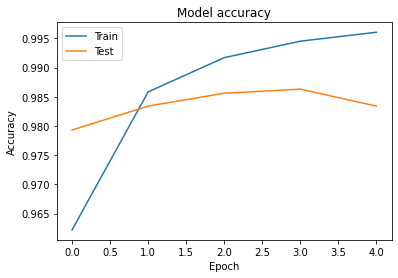

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

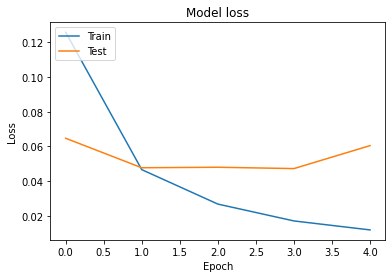

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:

#Save Model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
